In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from operator import attrgetter
import folium

---
### **Goals & Overview**

---
##### **Summary**

- Analisa data yang dilakukan menggunakan data Sample - Superstore
- Data tersebut merupakan data tahun 2016-2019
- Data tersebut merupakan data penjualan di negara United States
- Terdapat 3 segmen konsumen yang melakukan pembelian di Superstore: Consumer, Corporate, Home Office
- Terdapat 3 kategori produk di Superstore: Furniture, Technology, Office Supplies

##### **Objective**

- Tujuan analisa data: ***"Menentukan target pasar dan konsumen yang tepat untuk optimisasi strategi tahun 2020 toko Superstore, sehingga bisa menghasilkan revenue dan profit yang lebih tinggi"***
- Hal yang di analisa: Business Performance, Consumer Behavior, and Operational Performance
- Hasil analisa: Prioritas market yang dapat ditargetkan untuk strategi 2020 toko Superstore

---
### **Business Performance Analysis**

---
##### **Sales Performance YoY 2016-2019**

**Data Processing**

In [2]:
df = pd.read_excel('Sample - Superstore.xlsx', sheet_name='Orders')

c:\Users\wydzka\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [3]:
df1 = df.copy()
df1['Order Year'] = pd.PeriodIndex(df['Order Date'], freq= 'Y')
df1['Order Month'] = pd.PeriodIndex(df['Order Date'], freq= 'M')

In [4]:
df1.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2018,2018-11
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2018,2018-11


In [5]:
df_sales_yoy = df1.groupby('Order Month').sum()[['Sales']].reset_index()
df_sales_yoy['Order Month'] = pd.to_datetime(df_sales_yoy['Order Month'].astype(str))
df_sales_yoy['Order Month'] = df_sales_yoy['Order Month'].dt.strftime('%b-%Y')

**Line Plot Graph**

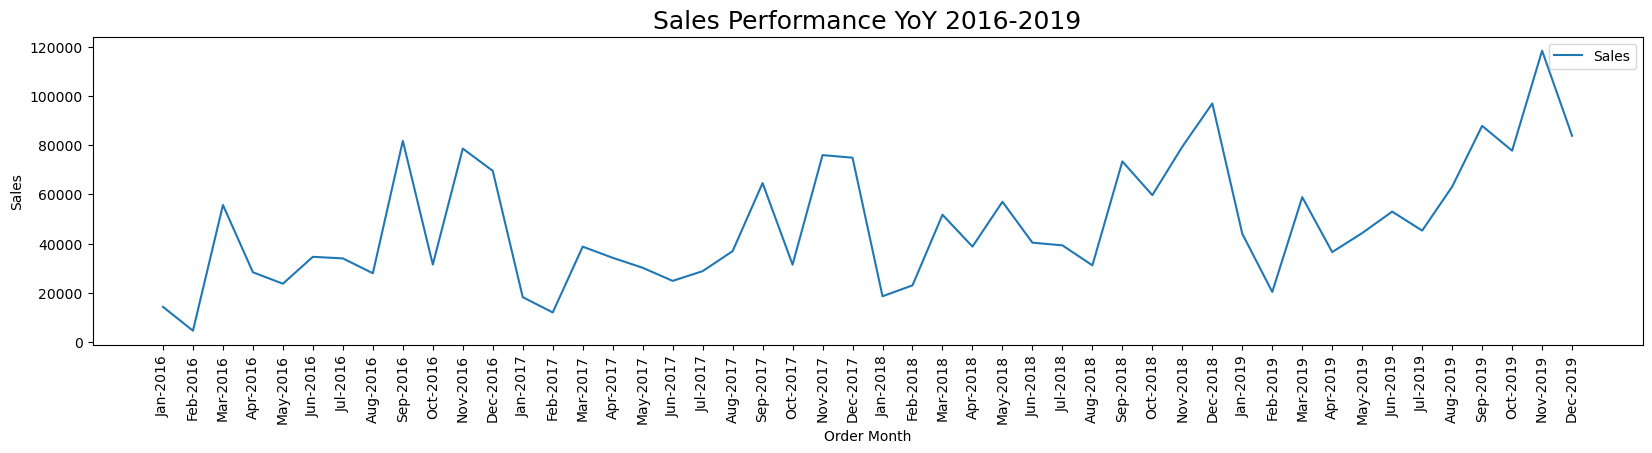

In [6]:
plt.figure(figsize=(20,4))

sns.lineplot(
    data= df_sales_yoy,
    x= 'Order Month',
    y= 'Sales',
    ci=0,
    label= 'Sales'
)

plt.xticks(ticks=df_sales_yoy['Order Month'], rotation= 90)
plt.title('Sales Performance YoY 2016-2019',size=18)

plt.show()

**Insights**
- Trend sales dari tahun 2016 ke 2019 bersifat fluktuatif
- Pada bulan November ke December tiap tahun nya terjadi peningkatan, kecuali tahun 2017, terjadi penurunan Sales

---
##### **YoY Sales Growth 2016-2019**

**Data Processing**

In [7]:
df1['Furniture Sales'] = df1[df1['Category'] == 'Furniture'][['Sales']]

df1['Office Supplies Sales'] = df1[df1['Category'] == 'Office Supplies'][['Sales']]

df1['Technology Sales'] = df1[df1['Category'] == 'Technology'][['Sales']]


In [8]:
df_growth = df1.groupby(['Category','Order Year'])[['Sales']].sum().reset_index()

In [9]:
df_funiture = df_growth[df_growth['Category']== 'Furniture']
df_funiture1 = df_funiture.copy()
df_funiture1['Growth (%)'] = (df_funiture1['Sales'].pct_change()*100).round(2)
df_funiture1['Order Year'] = df_funiture1['Order Year'].astype('str')
df_funiture1


,Category,Order Year,Sales,Growth (%)
0,Furniture,2016,157192.8531,NaN
1,Furniture,2017,170518.2370,8.48
2,Furniture,2018,198901.4360,16.65
3,Furniture,2019,215387.2692,8.29


In [10]:
df_Office_Supplies = df_growth[df_growth['Category']== 'Office Supplies']
df_Office_Supplies1 = df_Office_Supplies.copy()
df_Office_Supplies1['Growth (%)'] = (df_Office_Supplies1['Sales'].pct_change()*100).round(2)
df_Office_Supplies1['Order Year'] = df_Office_Supplies1['Order Year'].astype('str')
df_Office_Supplies1

,Category,Order Year,Sales,Growth (%)
4,Office Supplies,2016,151776.412,NaN
5,Office Supplies,2017,137233.463,-9.58
6,Office Supplies,2018,183939.982,34.03
7,Office Supplies,2019,246097.175,33.79


In [11]:
df_Technology = df_growth[df_growth['Category']== 'Technology']
df_Technology1 = df_Technology.copy()
df_Technology1['Growth (%)'] = (df_Technology1['Sales'].pct_change()*100).round(2)
df_Technology1['Order Year'] = df_Technology1['Order Year'].astype('str')
df_Technology1

,Category,Order Year,Sales,Growth (%)
8,Technology,2016,175278.233,NaN
9,Technology,2017,162780.809,-7.13
10,Technology,2018,226364.180,39.06
11,Technology,2019,271730.811,20.04


**Line Plot Graph**

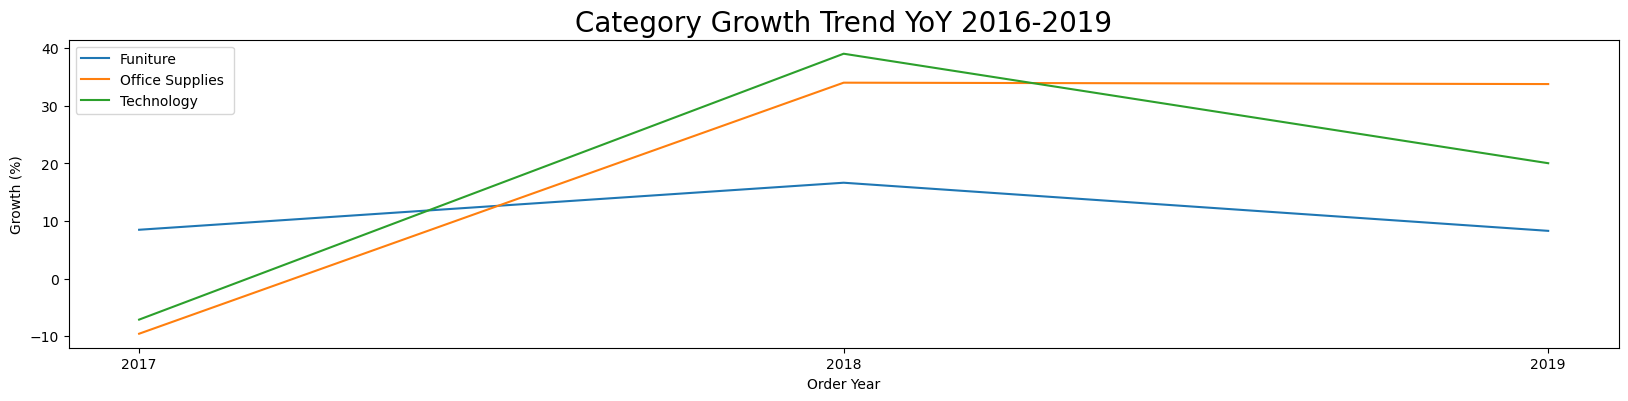

In [12]:
plt.figure(figsize=(20,4))

sns.lineplot(
    data= df_funiture1,
    x= 'Order Year',
    y= 'Growth (%)',
    estimator=np.sum,
    ci=0,
    label= 'Funiture'
)

sns.lineplot(
    data= df_Office_Supplies1,
    x= 'Order Year',
    y= 'Growth (%)',
    estimator=np.sum,
    ci=0,
    label= 'Office Supplies '
) 

sns.lineplot(
    data= df_Technology1,
    x= 'Order Year',
    y= 'Growth (%)',
    estimator=np.sum,
    ci=0,
    label= 'Technology'
) 

plt.title('Category Growth Trend YoY 2016-2019',size=20)
plt.show()

**Insights**

- Growth sales trend produk kategori Furniture cenderung stabil dan belum mengalami peningkatan yang signifikan
- Growth sales produk kategori Office Supplies mengalami peningkatan yang signifikan di tahun 2018 tetapi mengalami penurunan di tahun 2019
- Overall growth trend tiap kategori mengalami peningkatan, kecuali produk kategori Furniture (stagnant)

---
##### **Sales and Profit per Category**

**Bar Plot Graph**

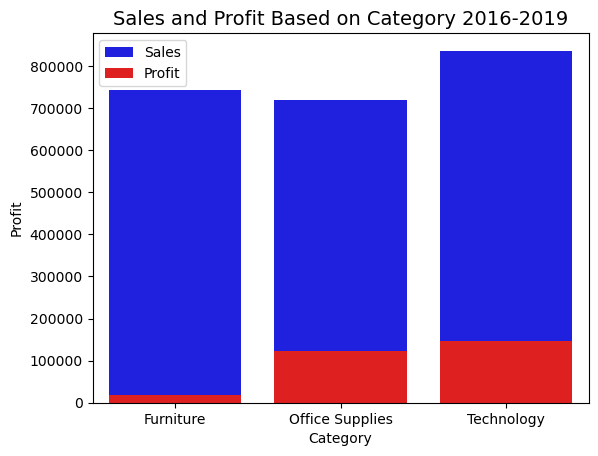

In [13]:
sns.barplot(data=df1, x='Category', y='Sales', estimator=np.sum, ci=0, color='blue', label = 'Sales' )
sns.barplot(data=df1, x='Category', y='Profit', estimator=np.sum, ci=0, color='red', label = 'Profit')

plt.title('Sales and Profit Based on Category 2016-2019',size=14)
plt.legend()
plt.show()

**Insights**
- Kategori produk dengan penjualan dan profit terbesar secara umum adalah kategori Technology 
- Kategori produk Furniture memiliki total penjualan lebih besar daripada produk Office Supplies, tetapi memiliki total profit yang lebih kecil
- Produk furniture cenderung diberikan diskon yang sangat besar, sehingga profit per penjualan sangat kecil


---
##### **Profit Ratio vs Sales per Category**

**Data Processing**

In [14]:
df_profit_ratio = df.copy()
df_profit_ratio = df_profit_ratio[['Order Date','Category', 'Sales', 'Profit']]
df_profit_ratio['Year'] = df_profit_ratio['Order Date'].dt.to_period(freq= 'Y')
df_profit_category = df_profit_ratio.groupby(by= ['Category', 'Year']).sum()
df_profit_category

Sales      Profit
Category        Year                         
Furniture       2016  157192.8531   5457.7255
                2017  170518.2370   3015.2029
                2018  198901.4360   6959.9531
                2019  215387.2692   3018.3913
Office Supplies 2016  151776.4120  22593.4161
                2017  137233.4630  25099.5338
                2018  183939.9820  35061.2292
                2019  246097.1750  39736.6217
Technology      2016  175278.2330  21492.8325
                2017  162780.8090  33503.8670
                2018  226364.1800  39773.9920
                2019  271730.8110  50684.2566

In [15]:
df_profit_category['Profit %'] = (df_profit_category['Profit'] / df_profit_category['Sales']) * 100
df_profit_category = df_profit_category.reset_index()
df_profit_category

,Category,Year,Sales,Profit,Profit %
0,Furniture,2016,157192.8531,5457.7255,3.471993
1,Furniture,2017,170518.2370,3015.2029,1.768258
2,Furniture,2018,198901.4360,6959.9531,3.499197
3,Furniture,2019,215387.2692,3018.3913,1.401379
4,Office Supplies,2016,151776.4120,22593.4161,14.885986
5,Office Supplies,2017,137233.4630,25099.5338,18.289660
6,Office Supplies,2018,183939.9820,35061.2292,19.061233
7,Office Supplies,2019,246097.1750,39736.6217,16.146720
8,Technology,2016,175278.2330,21492.8325,12.262123
9,Technology,2017,162780.8090,33503.8670,20.582197


**Bar Plot Graph**

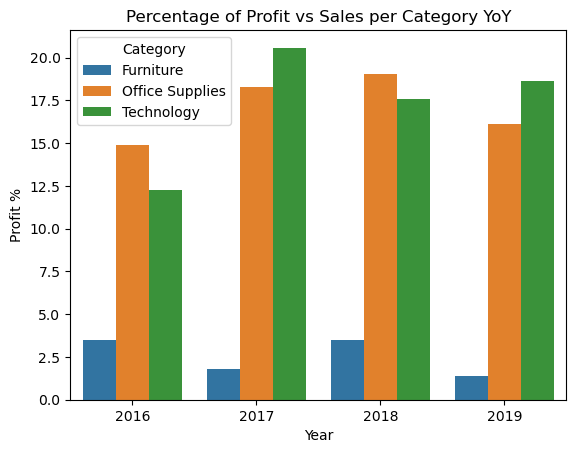

In [16]:
sns.barplot(
    data= df_profit_category, 
    x= 'Year', 
    y= 'Profit %', 
    hue= 'Category' )
plt.title('Percentage of Profit vs Sales per Category YoY')
plt.show()

**Insights**

- Profit penjualan produk kategori Furniture memiliki rasio perbandingan dengan sales paling kecil dibandingkan produk kategori lainnya
- Persentase profit vs sales dari penjualan produk kategori Furniture dan Technology, cenderung bersifat fluktuatif dari tahun ke tahun
- Persentase profit vs sales dari penjualan produk kategori Office Supplies cenderung meningkat dari tahun ke tahun, kecuali tahun 2019 ada penurunan

---
#### **Price Sensitivity Analysis**

In [17]:
df = pd.read_excel('Sample - Superstore.xlsx')

c:\Users\wydzka\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [18]:
df['Month'] = pd.PeriodIndex(df['Order Date'], freq='M')
df['Selling Price/Qty'] = df['Sales']/df['Quantity']
df['Normal Price/Qty'] = df['Selling Price/Qty']/(1-df['Discount'])
df['COGS/Qty'] = df['Selling Price/Qty'] - (df['Profit']/df['Quantity'])
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Selling Price/Qty,Normal Price/Qty,COGS/Qty
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2018-11,130.9800,130.98,110.0232
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2018-11,243.9800,243.98,170.7860
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2018-06,7.3100,7.31,3.8743
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2017-10,191.5155,348.21,268.1217
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2017-10,11.1840,13.98,9.9258


---
##### **Price Correlation**

**Correlation Level Chart**

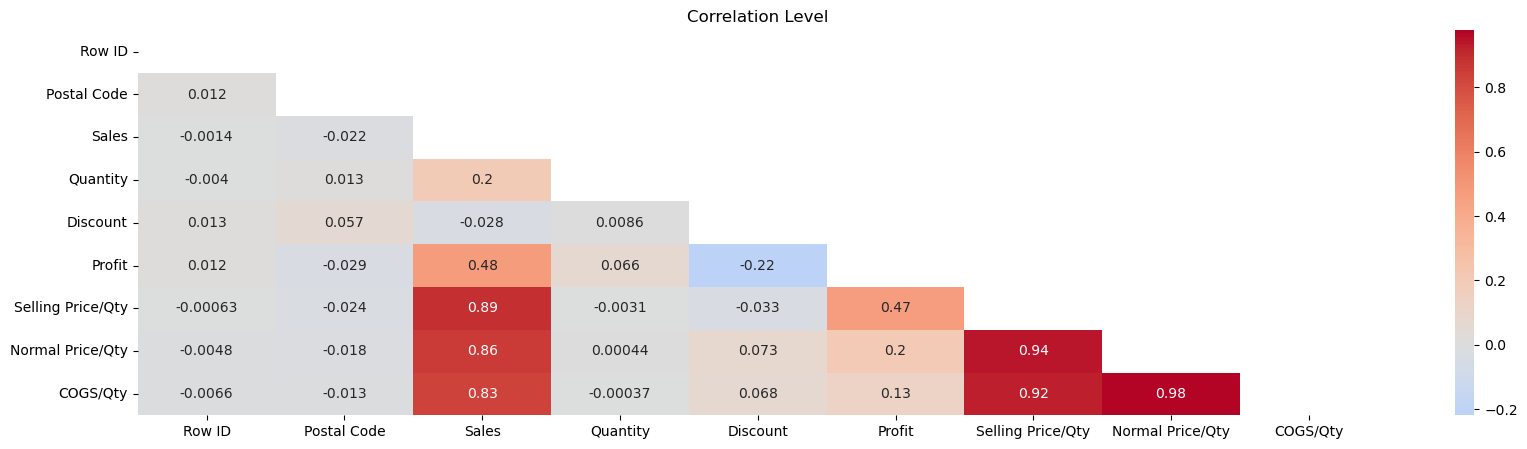

In [19]:
plt.figure(figsize=(20,5))
matrix = np.triu(df.corr())
sns.heatmap(
    data=df.corr(),
    annot = True,
    cmap = 'coolwarm',
    center = 0,
    mask = matrix
)
plt.title('Correlation Level')
plt.show()

**Insights**

- Secara keseluruhan, terdapat hubungan yang lemah dan berbanding terbalik (hubungan negatif) antara Profit dan Discount
- Secara keseluruhan, terdapat hubungan yang sedang dan berbanding lurus (hubungan positif) antara Sales dan Profit
- Secara keseluruhan, terdapat hubungan kuat dan berbanding lurus (hubungan positif) antara Sales dan Selling Price/Qty
- Secara keseluruhan, terdapat hubungan yang lemah dan berbanding terbalik (hubungan negatif) antara Sales dan Discount

---
##### **Price Elasticity**

**Furniture Category**

In [20]:
df_furniture = df[df['Category']=='Furniture']
df_sum = df_furniture.groupby('Month').sum()[['Sales','Quantity','Profit']].reset_index().sort_values('Month',ascending=True)
df_median = df_furniture.groupby('Month').median()[['Selling Price/Qty','Normal Price/Qty','COGS/Qty']].reset_index().sort_values('Month',ascending=True)

In [21]:
furniture_summmary = pd.merge(
    left=df_sum,
    right=df_median,
    on='Month',
    how='left')
furniture_summmary.head()

,Month,Sales,Quantity,Profit,Selling Price/Qty,Normal Price/Qty,COGS/Qty
0,2016-01,6242.525,70,805.4665,30.9350,57.940,37.0619
1,2016-02,1839.658,23,120.6917,60.8900,60.890,45.6675
2,2016-03,14573.956,131,-1128.6550,72.7920,120.980,100.4134
3,2016-04,7944.837,81,554.3801,82.8000,92.395,67.4128
4,2016-05,6912.787,97,-349.8776,51.9405,73.935,64.0299


In [22]:
furniture_summmary['Qty Change'] = furniture_summmary['Quantity'].pct_change()
furniture_summmary['Price Change'] = furniture_summmary['Selling Price/Qty'].pct_change()
furniture_summmary['Price Elasticity'] = furniture_summmary['Qty Change']/furniture_summmary['Price Change']
furniture_summmary.head()

,Month,Sales,Quantity,Profit,Selling Price/Qty,Normal Price/Qty,COGS/Qty,Qty Change,Price Change,Price Elasticity
0,2016-01,6242.525,70,805.4665,30.9350,57.940,37.0619,NaN,NaN,NaN
1,2016-02,1839.658,23,120.6917,60.8900,60.890,45.6675,-0.671429,0.968321,-0.693395
2,2016-03,14573.956,131,-1128.6550,72.7920,120.980,100.4134,4.695652,0.195467,24.022707
3,2016-04,7944.837,81,554.3801,82.8000,92.395,67.4128,-0.381679,0.137488,-2.776100
4,2016-05,6912.787,97,-349.8776,51.9405,73.935,64.0299,0.197531,-0.372699,-0.530001


In [23]:
q1 = furniture_summmary['Price Elasticity'].describe()['25%']
q3 = furniture_summmary['Price Elasticity'].describe()['75%']

iqr = q3-q1
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [24]:
furniture_outliers = furniture_summmary[(furniture_summmary['Price Elasticity']<lower_bound) | (furniture_summmary['Price Elasticity']>upper_bound)]
furniture_no_outliers = furniture_summmary[(furniture_summmary['Price Elasticity']>lower_bound) & (furniture_summmary['Price Elasticity']<upper_bound)]

In [25]:
price_elasticity_furniture = (furniture_no_outliers['Qty Change']/furniture_no_outliers['Price Change']).mean()
price_elasticity_furniture

-0.002959163943836518

**Office Supplies Category**

In [26]:
df_supplies = df[df['Category']=='Office Supplies']
df_sum = df_supplies.groupby('Month').sum()[['Sales','Quantity','Profit']].reset_index().sort_values('Month',ascending=True)
df_median = df_supplies.groupby('Month').median()[['Selling Price/Qty','Normal Price/Qty','COGS/Qty']].reset_index().sort_values('Month',ascending=True)

In [27]:
supplies_summmary = pd.merge(
    left=df_sum,
    right=df_median,
    on='Month',
    how='left')
supplies_summmary.head()

,Month,Sales,Quantity,Profit,Selling Price/Qty,Normal Price/Qty,COGS/Qty
0,2016-01,4851.080,169,788.9506,6.610,7.96,4.34175
1,2016-02,1071.724,103,176.0910,6.312,8.56,4.53680
2,2016-03,8605.879,370,1270.4133,6.597,7.61,4.51335
3,2016-04,11155.074,345,1000.2086,6.480,6.68,4.03920
4,2016-05,7135.624,281,1747.2044,7.310,9.68,5.49450


In [28]:
supplies_summmary['Qty Change'] = supplies_summmary['Quantity'].pct_change()
supplies_summmary['Price Change'] = supplies_summmary['Selling Price/Qty'].pct_change()
supplies_summmary['Price Elasticity'] = supplies_summmary['Qty Change']/supplies_summmary['Price Change']
supplies_summmary.head()

,Month,Sales,Quantity,Profit,Selling Price/Qty,Normal Price/Qty,COGS/Qty,Qty Change,Price Change,Price Elasticity
0,2016-01,4851.080,169,788.9506,6.610,7.96,4.34175,NaN,NaN,NaN
1,2016-02,1071.724,103,176.0910,6.312,8.56,4.53680,-0.390533,-0.045083,8.662484
2,2016-03,8605.879,370,1270.4133,6.597,7.61,4.51335,2.592233,0.045152,57.411139
3,2016-04,11155.074,345,1000.2086,6.480,6.68,4.03920,-0.067568,-0.017735,3.809771
4,2016-05,7135.624,281,1747.2044,7.310,9.68,5.49450,-0.185507,0.128086,-1.448298


In [29]:
q1 = supplies_summmary['Price Elasticity'].describe()['25%']
q3 = supplies_summmary['Price Elasticity'].describe()['75%']

iqr = q3-q1
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [30]:
supplies_outliers = supplies_summmary[(supplies_summmary['Price Elasticity']<lower_bound) | (supplies_summmary['Price Elasticity']>upper_bound)]
supplies_no_outliers = supplies_summmary[(supplies_summmary['Price Elasticity']>lower_bound) & (supplies_summmary['Price Elasticity']<upper_bound)]

In [31]:
price_elasticity_supplies = (supplies_no_outliers['Qty Change']/supplies_no_outliers['Price Change']).mean()
price_elasticity_supplies

0.3896491806468506

**Tecnology Category**

In [32]:
df_tech = df[df['Category']=='Technology']
df_sum = df_tech.groupby('Month').sum()[['Sales','Quantity','Profit']].reset_index().sort_values('Month',ascending=True)
df_median = df_tech.groupby('Month').median()[['Selling Price/Qty','Normal Price/Qty','COGS/Qty']].reset_index().sort_values('Month',ascending=True)


In [33]:
tech_summmary = pd.merge(
    left=df_sum,
    right=df_median,
    on='Month',
    how='left')
tech_summmary.head()

,Month,Sales,Quantity,Profit,Selling Price/Qty,Normal Price/Qty,COGS/Qty
0,2016-01,3143.290,45,855.7736,93.990,93.990,64.67400
1,2016-02,1608.510,33,565.5257,57.171,61.695,38.62080
2,2016-03,32511.174,84,356.9716,92.956,116.195,75.87630
3,2016-04,9195.434,110,1934.2465,73.992,79.990,50.71805
4,2016-05,9599.876,88,1341.3828,55.990,55.990,42.55240


In [34]:
tech_summmary['Qty Change'] = tech_summmary['Quantity'].pct_change()
tech_summmary['Price Change'] = tech_summmary['Selling Price/Qty'].pct_change()
tech_summmary['Price Elasticity'] = tech_summmary['Qty Change']/tech_summmary['Price Change']
tech_summmary.head()

,Month,Sales,Quantity,Profit,Selling Price/Qty,Normal Price/Qty,COGS/Qty,Qty Change,Price Change,Price Elasticity
0,2016-01,3143.290,45,855.7736,93.990,93.990,64.67400,NaN,NaN,NaN
1,2016-02,1608.510,33,565.5257,57.171,61.695,38.62080,-0.266667,-0.391733,0.680735
2,2016-03,32511.174,84,356.9716,92.956,116.195,75.87630,1.545455,0.625929,2.469056
3,2016-04,9195.434,110,1934.2465,73.992,79.990,50.71805,0.309524,-0.204010,-1.517195
4,2016-05,9599.876,88,1341.3828,55.990,55.990,42.55240,-0.200000,-0.243297,0.822042


In [35]:
q1 = tech_summmary['Price Elasticity'].describe()['25%']
q3 = tech_summmary['Price Elasticity'].describe()['75%']

iqr = q3-q1
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [36]:
tech_outliers = tech_summmary[(tech_summmary['Price Elasticity']<lower_bound) | (tech_summmary['Price Elasticity']>upper_bound)]
tech_no_outliers = tech_summmary[(tech_summmary['Price Elasticity']>lower_bound) & (tech_summmary['Price Elasticity']<upper_bound)]

In [37]:
price_elasticity_tech = (tech_no_outliers['Qty Change']/tech_no_outliers['Price Change']).mean()
price_elasticity_tech

-0.03183284872712273

**Price Elasticity Table**

In [38]:
price_elasticity = pd.DataFrame([price_elasticity_furniture,price_elasticity_supplies,price_elasticity_tech])
price_elasticity = price_elasticity.rename(
    columns={0:'Price Elasticity'},
    index={0: 'Furniture', 1: 'Office Supplies', 2: 'Technology'})
price_elasticity

,Price Elasticity
Furniture,-0.002959
Office Supplies,0.389649
Technology,-0.031833


**Insights**

- Produk kategori Furniture dan Technology memiliki nilai price elasticity yang rendah dan negatif. Artinya, perubahan harga produk kemungkinan kecil akan mempengaruhi demand penjualan produk tersebut.
- Produk kategori Office Supplies memiliki nilai price elasticity yang cukup tinggi. Artinya, perubahan harga produk kemungkinan besar akan mempengaruhi demand penjualan produk tersebut.


---
### **Buyer Behavior Analysis**

---
##### **Buyer Purchasing Power**

**Average Order Value (AOV)**

In [39]:
df_abs = df.groupby(['Category','Segment'])[['Sales','Quantity']].sum().reset_index()
df_asp = df.groupby(['Category','Segment'])[['Selling Price/Qty']].median().round(2).reset_index()[['Selling Price/Qty']]


In [40]:
df_abs['AOV'] = (df_abs['Sales']/df_abs['Quantity']).round(2)
df_abs

,Category,Segment,Sales,Quantity,AOV
0,Furniture,Consumer,391049.3120,4166,93.87
1,Furniture,Corporate,229019.7858,2495,91.79
2,Furniture,Home Office,121930.6975,1367,89.20
3,Office Supplies,Consumer,363952.1360,11758,30.95
4,Office Supplies,Corporate,230676.4620,7018,32.87
5,Office Supplies,Home Office,124418.4340,4130,30.13
6,Technology,Consumer,406399.8970,3597,112.98
7,Technology,Corporate,246450.1190,2095,117.64
8,Technology,Home Office,183304.0170,1247,147.00


**Average Selling Price (ASP)**

In [41]:
basket_summary = df_abs.join(df_asp).rename(columns={'Selling Price/Qty':'ASP'})
basket_summary

,Category,Segment,Sales,Quantity,AOV,ASP
0,Furniture,Consumer,391049.3120,4166,93.87,63.69
1,Furniture,Corporate,229019.7858,2495,91.79,57.54
2,Furniture,Home Office,121930.6975,1367,89.20,56.86
3,Office Supplies,Consumer,363952.1360,11758,30.95,7.38
4,Office Supplies,Corporate,230676.4620,7018,32.87,7.66
5,Office Supplies,Home Office,124418.4340,4130,30.13,7.28
6,Technology,Consumer,406399.8970,3597,112.98,51.00
7,Technology,Corporate,246450.1190,2095,117.64,52.79
8,Technology,Home Office,183304.0170,1247,147.00,63.99


**Basket Summary**

In [42]:
basket_summary['ABS'] = (basket_summary['AOV']/basket_summary['ASP']).round(2)
basket_summary = basket_summary.drop(columns=['Sales','Quantity'])

In [43]:
basket_summary

,Category,Segment,AOV,ASP,ABS
0,Furniture,Consumer,93.87,63.69,1.47
1,Furniture,Corporate,91.79,57.54,1.60
2,Furniture,Home Office,89.20,56.86,1.57
3,Office Supplies,Consumer,30.95,7.38,4.19
4,Office Supplies,Corporate,32.87,7.66,4.29
5,Office Supplies,Home Office,30.13,7.28,4.14
6,Technology,Consumer,112.98,51.00,2.22
7,Technology,Corporate,117.64,52.79,2.23
8,Technology,Home Office,147.00,63.99,2.30


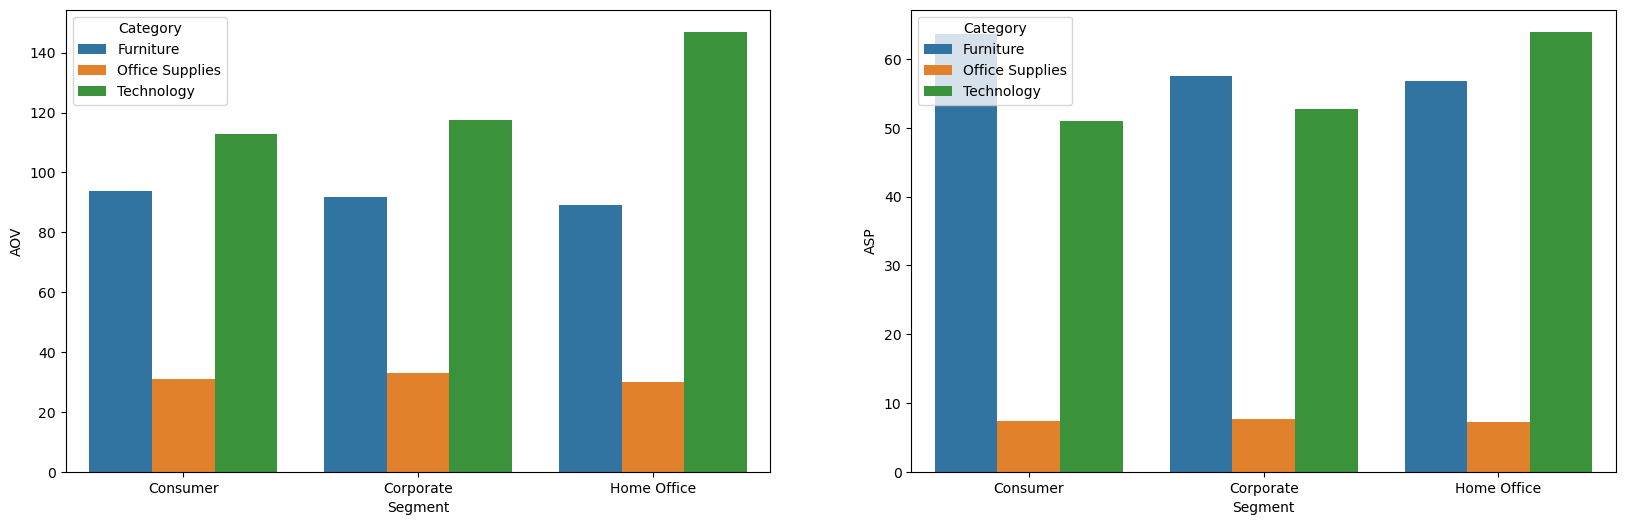

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.barplot(data=basket_summary,x='Segment',y='AOV',ci=0,hue='Category',ax=axes[0])
sns.barplot(data=basket_summary,x='Segment',y='ASP',ci=0,hue='Category',ax=axes[1])
plt.show()

**Insights**

- Untuk produk kategori Furniture, daya beli paling besar berada pada customer segment Consumer
- Untuk produk kategori Office Supplies, daya beli paling besar berada pada customer segment Corporate
- Untuk produk kategori Technology, daya beli paling besar berada pada customer pada segment Home Office
- Average Selling Price produk kategori Furniture paling rendah pada penjualan ke customer segment Home Office
- Average Selling Price produk kategori Office Supplies paling rendah pada penjualan ke customer segment Home Office
- Average Selling Price produk kategori Technology paling rendah pada penjualan ke customer segment Consumer

---
##### **Buyer Demographic**

In [45]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Selling Price/Qty,Normal Price/Qty,COGS/Qty
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2018-11,130.98,130.98,110.0232


In [46]:
df_region = df.copy()

In [47]:
df_region = df.groupby('Region').sum()[['Sales']].reset_index()
df_region

,Region,Sales
0,Central,501239.8908
1,East,678781.2400
2,South,391721.9050
3,West,725457.8245


Text(0.5, 1.0, 'Total Sales per Region')

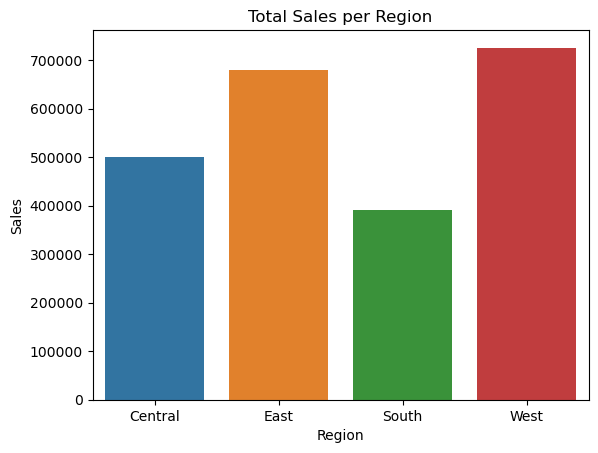

In [48]:
sns.barplot(data= df_region, x= 'Region', y= 'Sales')

plt.title('Total Sales per Region')


In [49]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

**South Region**

In [50]:
df_south = df.loc[df['Region'] == 'South', ['City', 'Sales']].copy()
df_south

,City,Sales
0,Henderson,261.9600
1,Henderson,731.9400
3,Fort Lauderdale,957.5775
4,Fort Lauderdale,22.3680
12,Concord,15.5520
...,...,...
9971,Smyrna,140.7500
9980,Lafayette,85.9800
9987,Athens,79.9900
9988,Athens,206.1000


In [51]:
df_south = df_south.groupby('City').sum().reset_index()
df_south

,City,Sales
0,Alexandria,5519.570
1,Apopka,904.554
2,Arlington,14366.760
3,Asheville,1475.376
4,Athens,1720.810
...,...,...
120,Waynesboro,3058.770
121,West Palm Beach,141.328
122,Wilmington,743.162
123,Wilson,368.732


In [52]:
df_south = df_south.sort_values('Sales', ascending= False).head(63)
df_south

,City,Sales
56,Jacksonville,44713.183
5,Atlanta,17197.840
109,Springfield,16628.530
46,Henderson,15661.010
22,Columbus,14845.050
...,...,...
107,Southaven,1455.390
93,Plantation,1436.836
9,Bossier City,1417.180
113,Tamarac,1413.510


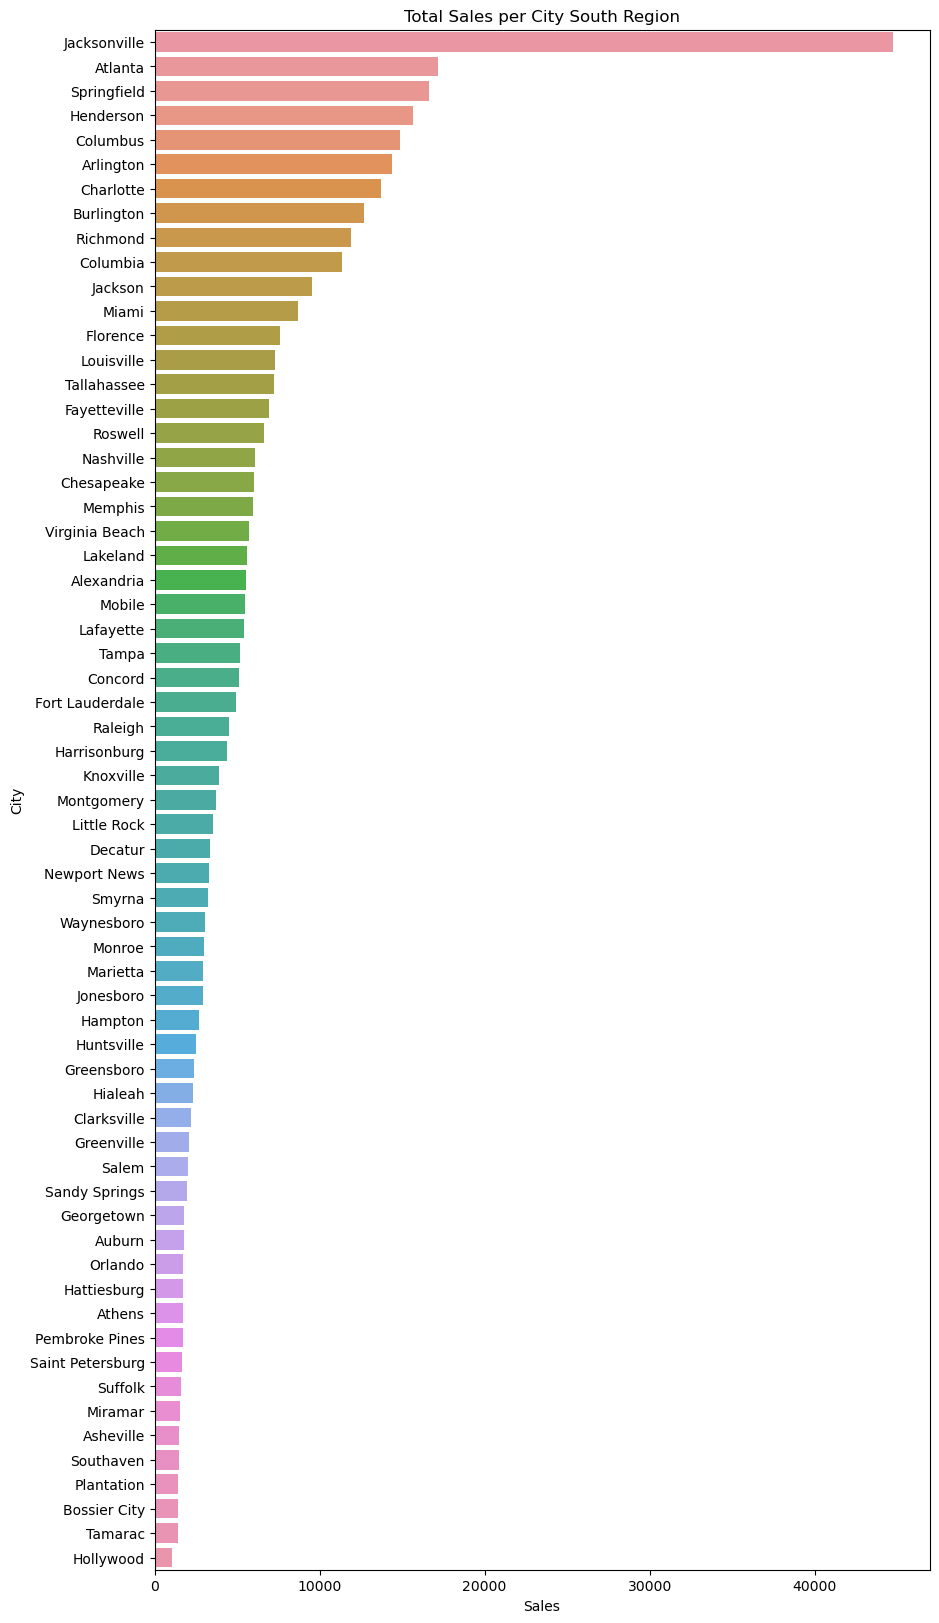

In [53]:
plt.figure(figsize=(10, 20))

sns.barplot(data= df_south, x= 'Sales', y= 'City', ci= 0)

# custom_palette = ["#FF0000"]
# sns.set_palette(custom_palette)

plt.title('Total Sales per City South Region')
plt.show()

In [54]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

**West Region**

In [55]:
df_west = df.loc[df['Region'] == 'West', ['City', 'Sales']].copy()
df_west

,City,Sales
2,Los Angeles,14.620
5,Los Angeles,48.860
6,Los Angeles,7.280
7,Los Angeles,907.152
8,Los Angeles,18.504
...,...,...
9986,Los Angeles,36.240
9990,Costa Mesa,91.960
9991,Costa Mesa,258.576
9992,Costa Mesa,29.600


In [56]:
df_west = df_west.groupby('City').sum().reset_index()
df_west

,City,Sales
0,Albuquerque,2220.160
1,Anaheim,7986.870
2,Antioch,19.440
3,Apple Valley,1915.081
4,Arvada,503.400
...,...,...
164,Westminster,3826.646
165,Whittier,444.768
166,Woodland,264.662
167,Yucaipa,50.800


In [57]:
df_west = df_west.sort_values('Sales', ascending= False).head(85)
df_west

,City,Sales
80,Los Angeles,175851.341
144,Seattle,119540.742
133,San Francisco,112669.092
132,San Diego,47521.029
35,Denver,12198.793
...,...,...
21,Chandler,1076.747
152,Tempe,1070.302
103,Parker,1067.942
24,Chula Vista,1041.620


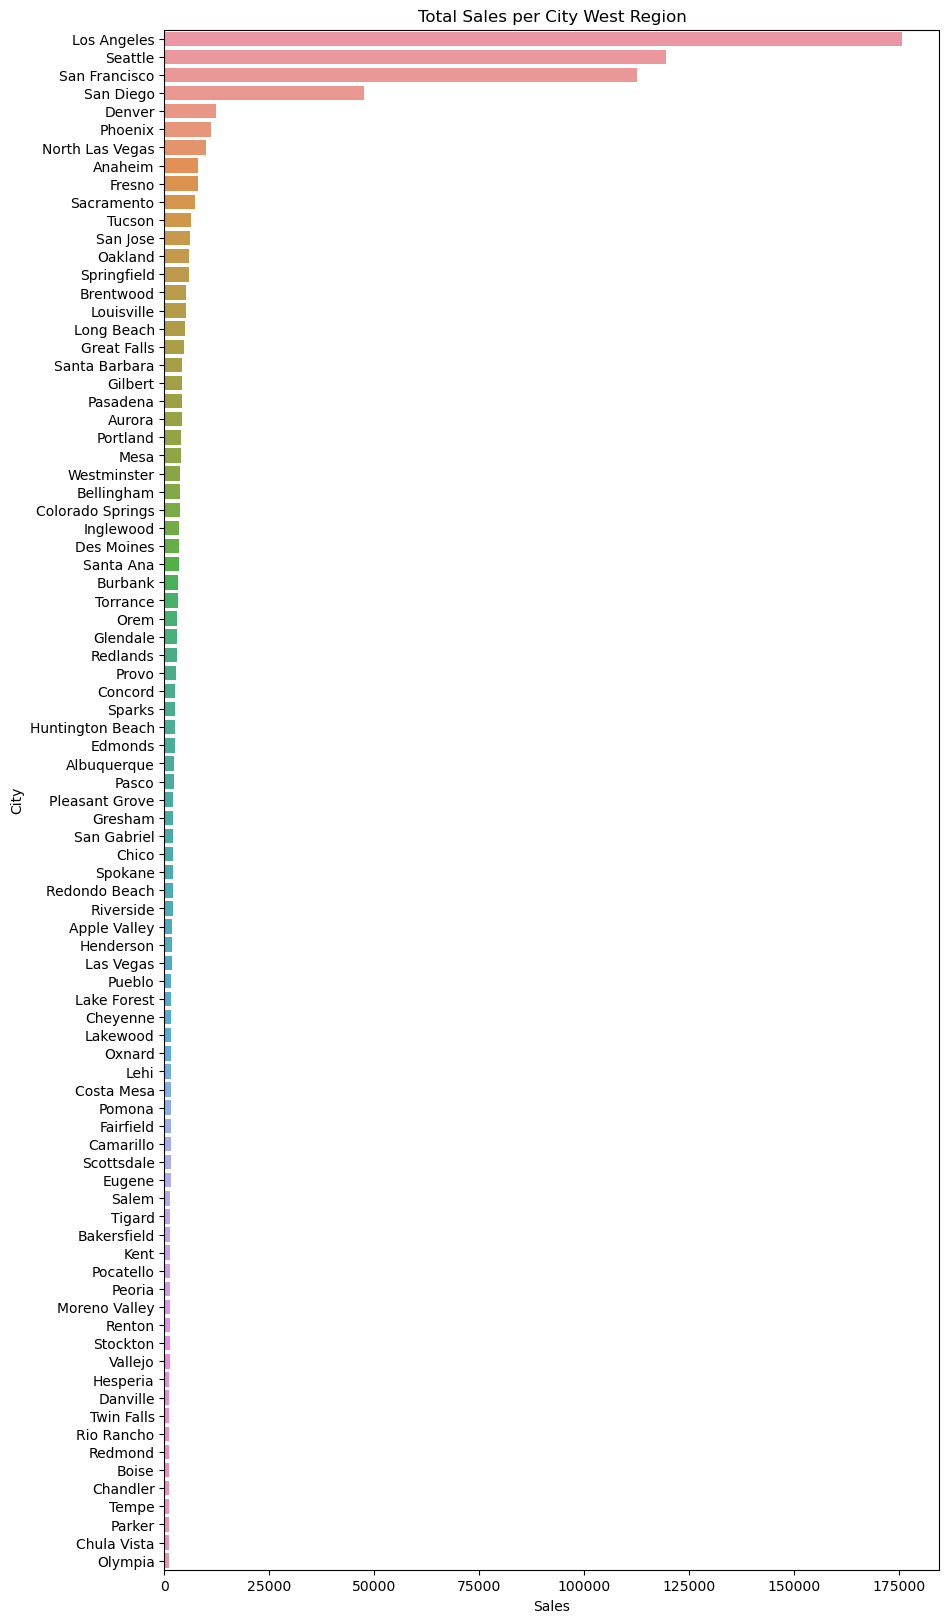

In [58]:
plt.figure(figsize=(10, 20))

sns.barplot(data= df_west, x= 'Sales', y= 'City', ci= 0)

plt.title('Total Sales per City West Region')
plt.show()

In [59]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

**Central Region**

In [60]:
df_central = df.loc[df['Region'] == 'Central', ['City', 'Sales']].copy()
df_central

,City,Sales
14,Fort Worth,68.8100
15,Fort Worth,2.5440
16,Madison,665.8800
21,Fremont,19.4600
22,Fremont,60.3400
...,...,...
9961,Houston,65.5840
9962,Houston,383.4656
9972,Houston,99.5680
9982,Grand Rapids,35.5600


In [61]:
df_central = df_central.groupby('City').sum().reset_index()
df_central

,City,Sales
0,Aberdeen,25.5000
1,Abilene,1.3920
2,Allen,290.2060
3,Amarillo,3773.0628
4,Ann Arbor,889.2730
...,...,...
176,Westland,2057.9760
177,Wheeling,737.1420
178,Wichita,825.2700
179,Woodbury,607.6500


In [62]:
df_central = df_central.sort_values('Sales', ascending= False).head(91)
df_central

,City,Sales
75,Houston,64504.7604
27,Chicago,48539.5410
44,Detroit,42446.9440
154,San Antonio,21843.5280
36,Dallas,20131.9322
...,...,...
164,Texas City,790.9720
107,Mishawaka,776.2400
177,Wheeling,737.1420
134,Port Arthur,737.0528


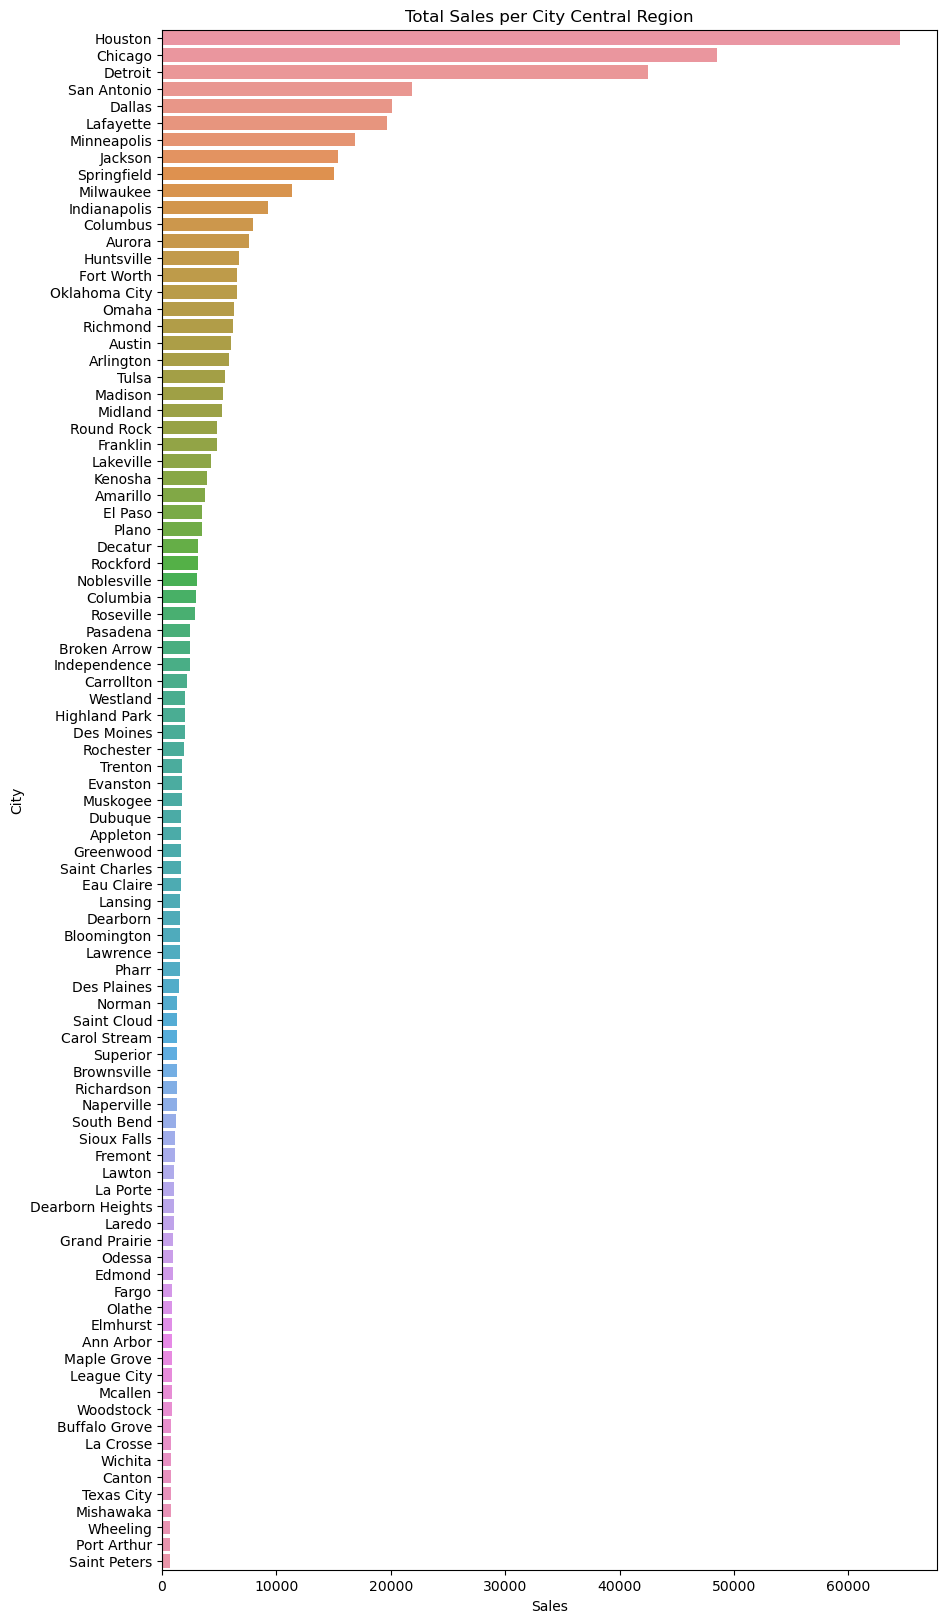

In [63]:
plt.figure(figsize=(10, 20))

sns.barplot(data= df_central, x= 'Sales', y= 'City', ci= 0)

plt.title('Total Sales per City Central Region')
plt.show()

In [64]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

**East Region**

In [65]:
df_east = df.loc[df['Region'] == 'East', ['City', 'Sales']].copy()
df_east

,City,Sales
23,Philadelphia,71.372
27,Philadelphia,3083.430
28,Philadelphia,9.618
29,Philadelphia,124.200
30,Philadelphia,3.264
...,...,...
9968,Plainfield,735.980
9969,Plainfield,22.750
9981,Fairfield,16.520
9984,Long Beach,31.500


In [66]:
df_east = df_east.groupby('City').sum().reset_index()
df_east

,City,Sales
0,Akron,2729.986
1,Allentown,853.252
2,Altoona,20.451
3,Andover,435.850
4,Atlantic City,23.360
...,...,...
103,Wheeling,1209.824
104,Wilmington,6553.899
105,Woonsocket,195.550
106,Yonkers,7657.666


In [67]:
df_east = df_east.sort_values('Sales', ascending= False).head(54)
df_east

,City,Sales
73,New York City,256368.161
83,Philadelphia,109077.013
74,Newark,28576.119
46,Lakewood,16608.364
85,Providence,15980.650
24,Columbus,15900.793
23,Columbia,10962.350
47,Lancaster,9414.020
15,Buffalo,9063.496
16,Burlington,8929.370


Text(0.5, 1.0, 'Total Sales per City East Region')

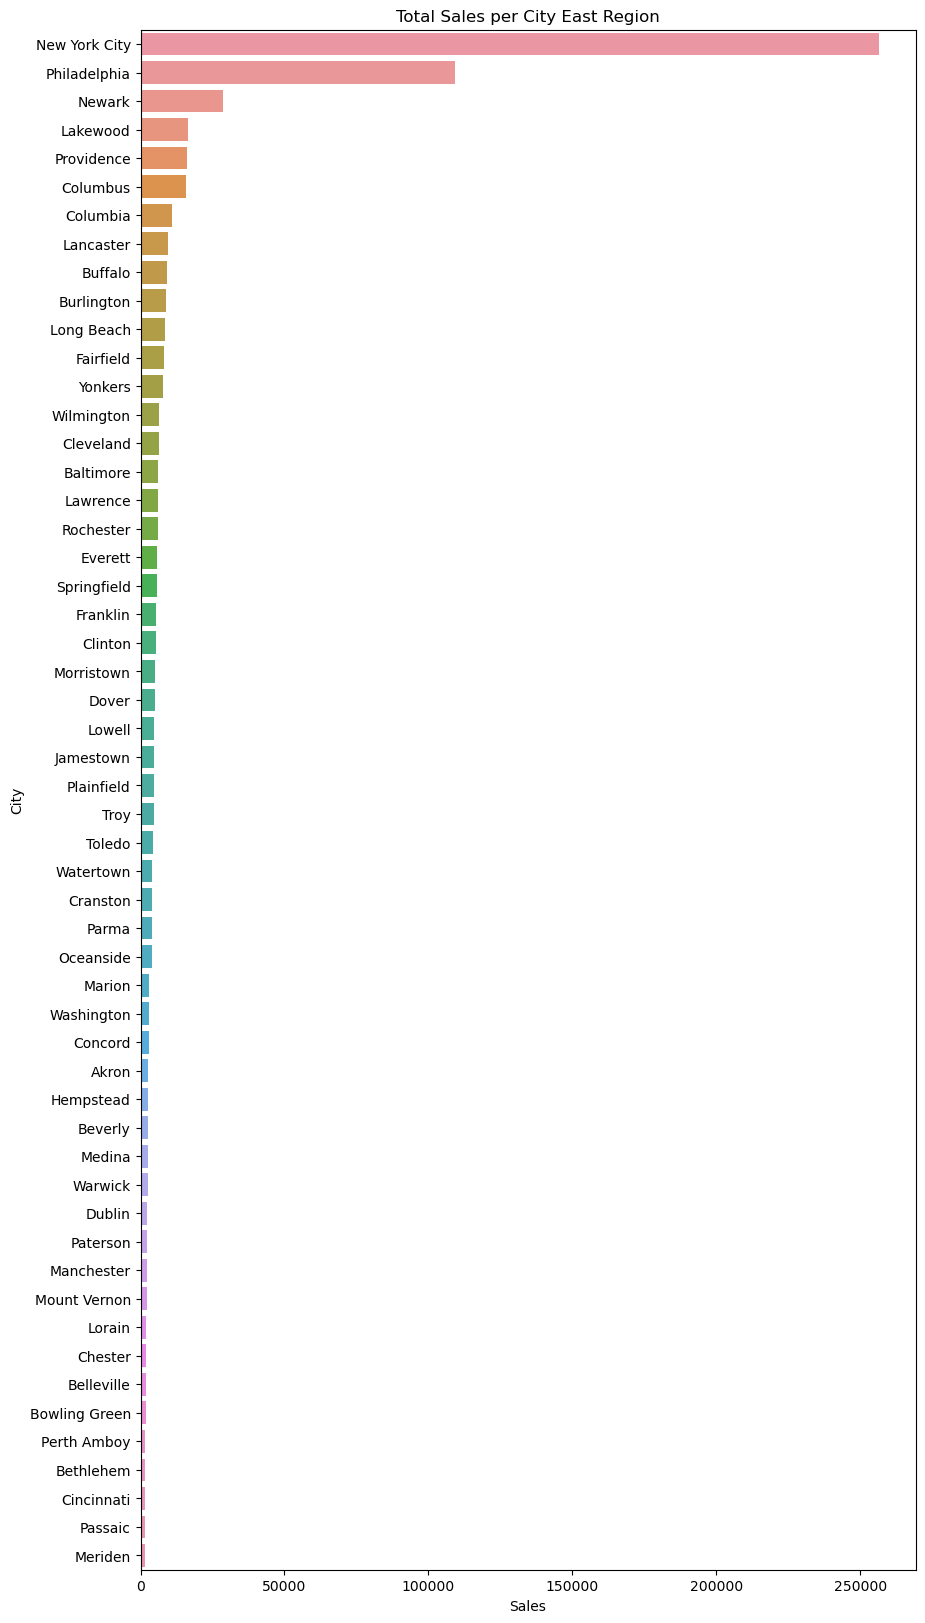

In [68]:
plt.figure(figsize=(10, 20))

sns.barplot(data= df_east, x= 'Sales', y= 'City', ci= 0)

plt.title('Total Sales per City East Region')

In [69]:
pivot_area = pd.pivot_table(
    data=df,
    columns='Region',
    index='City',
    values='Sales',
    aggfunc=np.sum
)

pivot_area

Region,Central,East,South,West
City,,,,
Aberdeen,25.500,NaN,NaN,NaN
Abilene,1.392,NaN,NaN,NaN
Akron,NaN,2729.986,NaN,NaN
Albuquerque,NaN,NaN,NaN,2220.160
Alexandria,NaN,NaN,5519.57,NaN
...,...,...,...,...
Woonsocket,NaN,195.550,NaN,NaN
Yonkers,NaN,7657.666,NaN,NaN
York,NaN,817.978,NaN,NaN


**Region Summary**

In [70]:
central_max = pivot_area['Central'].idxmax()
east_max = pivot_area['East'].idxmax()
south_max = pivot_area['South'].idxmax()
west_max = pivot_area['West'].idxmax()

In [71]:
region_summary = pd.DataFrame([central_max,east_max,south_max,west_max,])
region_summary = region_summary.rename(
    columns={0:'City'},
    index={0: 'Central', 1: 'East', 2: 'South',3:'West'})
region_summary

,City
Central,Houston
East,New York City
South,Jacksonville
West,Los Angeles


**Insights**

- Urutan region dengan sales paling tinggi adalah West, East, Central, South
- Kota dari masing-masing region dengan sales tertinggi adalah Los Angeles, New York City, Houston, Jacksonville

---
##### **Cohort Analysis**

**Consumer Segment**

In [72]:
df_consumer = df.loc[df['Segment'] == 'Consumer']
df_corporate = df.loc[df['Segment'] == 'Corporate']
df_home_office = df.loc[df['Segment'] == 'Home Office']
df_cohort_consumer = df_consumer[['Order Date', 'Customer ID']].copy()
df_cohort_consumer.head()

,Order Date,Customer ID
0,2018-11-08,CG-12520
1,2018-11-08,CG-12520
3,2017-10-11,SO-20335
4,2017-10-11,SO-20335
5,2016-06-09,BH-11710


In [73]:
# Cohort Quarter
df_cohort_consumer['cohort_quarter'] = df_cohort_consumer.groupby('Customer ID')['Order Date'].transform('min')
df_cohort_consumer['cohort_quarter'] =df_cohort_consumer['cohort_quarter'].dt.to_period('Q')

# Current Order
df_cohort_consumer['current_order_quarter'] = df_cohort_consumer['Order Date'].dt.to_period('Q')

# n_Customers
df_cohort_consumer = df_cohort_consumer.groupby(by=['cohort_quarter', 'current_order_quarter'])[['Customer ID']].nunique().reset_index()
df_cohort_consumer = df_cohort_consumer.rename(columns= {'Customer ID': 'n_customers'})

# Period Number
df_cohort_consumer['period_number'] = df_cohort_consumer['current_order_quarter'] - df_cohort_consumer['cohort_quarter']
df_cohort_consumer['period_number'] = df_cohort_consumer['period_number'].apply(attrgetter('n'))

df_cohort_consumer

,cohort_quarter,current_order_quarter,n_customers,period_number
0,2016Q1,2016Q1,70,0
1,2016Q1,2016Q2,11,1
2,2016Q1,2016Q3,16,2
3,2016Q1,2016Q4,23,3
4,2016Q1,2017Q1,13,4
...,...,...,...,...
124,2019Q2,2019Q2,1,0
125,2019Q2,2019Q4,1,2
126,2019Q3,2019Q3,2,0
127,2019Q3,2019Q4,1,1


In [74]:
df_cohort_consumer_pivot = df_cohort_consumer.pivot_table(
    index= 'cohort_quarter',
    columns= 'period_number',
    values='n_customers'
)

df_cohort_consumer_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
cohort_quarter,,,,,,,,,,,,,,,,
2016Q1,70.0,11.0,16.0,23.0,13.0,13.0,19.0,22.0,14.0,22.0,20.0,32.0,22.0,24.0,31.0,37.0
2016Q2,83.0,21.0,27.0,13.0,29.0,25.0,43.0,16.0,26.0,29.0,40.0,17.0,33.0,41.0,43.0,NaN
2016Q3,87.0,31.0,20.0,25.0,25.0,38.0,10.0,28.0,33.0,41.0,15.0,37.0,37.0,48.0,NaN,NaN
2016Q4,71.0,9.0,12.0,19.0,33.0,17.0,24.0,28.0,28.0,17.0,26.0,31.0,46.0,NaN,NaN,NaN
2017Q1,14.0,2.0,5.0,3.0,2.0,4.0,7.0,5.0,5.0,5.0,2.0,8.0,NaN,NaN,NaN,NaN
2017Q2,19.0,5.0,7.0,5.0,6.0,9.0,8.0,6.0,5.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN
2017Q3,13.0,7.0,4.0,2.0,2.0,4.0,3.0,6.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2017Q4,18.0,1.0,3.0,7.0,6.0,7.0,5.0,6.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018Q1,8.0,4.0,3.0,4.0,6.0,4.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df_cohort_consumer_percent = (df_cohort_consumer_pivot.div(df_cohort_consumer_pivot[0], axis=0) * 100).round(2)
user_count = df_cohort_consumer_pivot[0].to_frame()
df_cohort_consumer_percent.insert(0, 'Total_Customer', user_count)
df_cohort_consumer_percent

period_number,Total_Customer,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
cohort_quarter,,,,,,,,,,,,,,,,,
2016Q1,70.0,100.0,15.71,22.86,32.86,18.57,18.57,27.14,31.43,20.00,31.43,28.57,45.71,31.43,34.29,44.29,52.86
2016Q2,83.0,100.0,25.30,32.53,15.66,34.94,30.12,51.81,19.28,31.33,34.94,48.19,20.48,39.76,49.40,51.81,NaN
2016Q3,87.0,100.0,35.63,22.99,28.74,28.74,43.68,11.49,32.18,37.93,47.13,17.24,42.53,42.53,55.17,NaN,NaN
2016Q4,71.0,100.0,12.68,16.90,26.76,46.48,23.94,33.80,39.44,39.44,23.94,36.62,43.66,64.79,NaN,NaN,NaN
2017Q1,14.0,100.0,14.29,35.71,21.43,14.29,28.57,50.00,35.71,35.71,35.71,14.29,57.14,NaN,NaN,NaN,NaN
2017Q2,19.0,100.0,26.32,36.84,26.32,31.58,47.37,42.11,31.58,26.32,57.89,57.89,NaN,NaN,NaN,NaN,NaN
2017Q3,13.0,100.0,53.85,30.77,15.38,15.38,30.77,23.08,46.15,46.15,23.08,NaN,NaN,NaN,NaN,NaN,NaN
2017Q4,18.0,100.0,5.56,16.67,38.89,33.33,38.89,27.78,33.33,55.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018Q1,8.0,100.0,50.00,37.50,50.00,75.00,50.00,62.50,50.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Analisa Perilaku Customer Segmen Consumer Super Store')

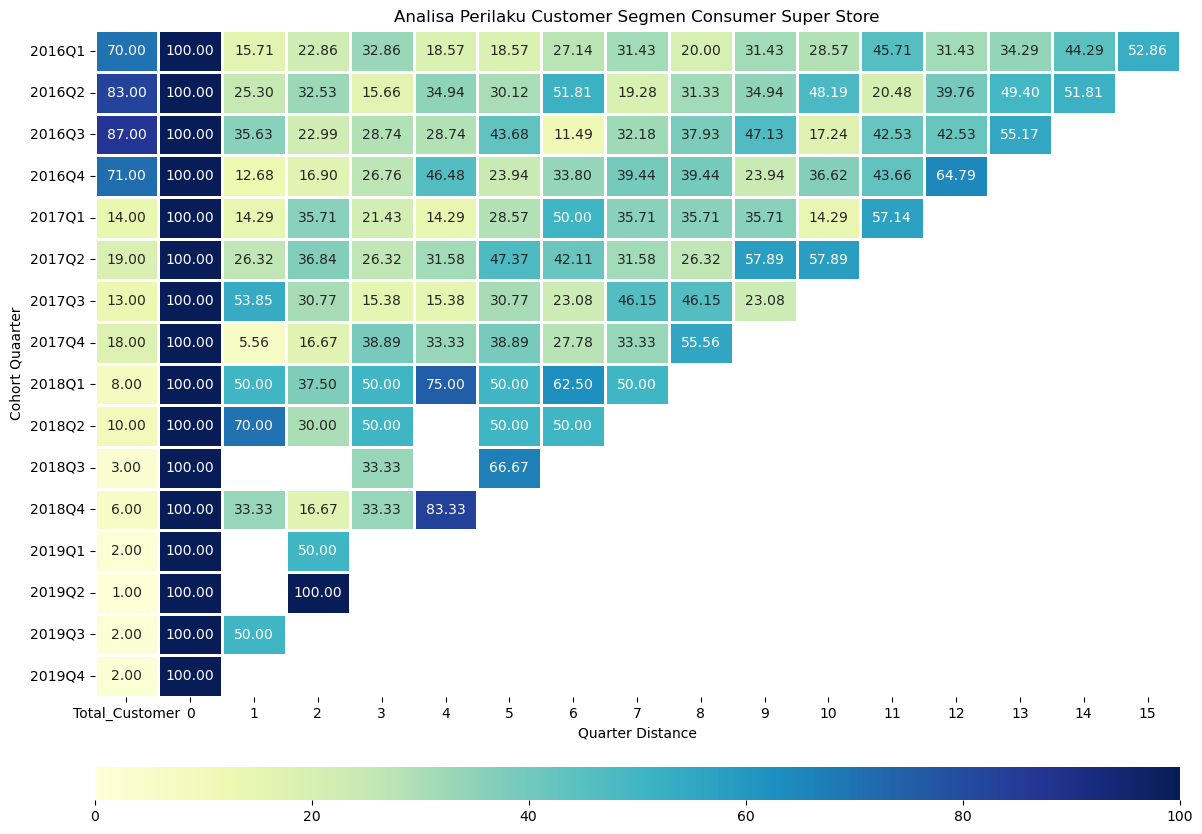

In [76]:
grid_kw = {
    'height_ratios': (20, 1),       
    'hspace': 0.2                   
}


fig, (ax_top, ax_bottom) = plt.subplots(nrows= 2, ncols= 1, figsize= (14, 10), gridspec_kw= grid_kw)

sns.heatmap(
    data= df_cohort_consumer_percent,
    ax= ax_top,                                 
    cbar_ax= ax_bottom,                         
    cbar_kws= {'orientation': 'horizontal'},    
    annot= True,                                
    fmt= '.2f',                                 
    cmap= 'YlGnBu',                             
    linewidths= 2,
    vmin= 0,
    vmax= 100
)
ax_top.set_xlabel('Quarter Distance')
ax_top.set_ylabel('Cohort Quaarter')
ax_top.set_title('Analisa Perilaku Customer Segmen Consumer Super Store')


**Corporate Segment**

In [77]:
# Cohort Quarter
df_cohort_corporate = df_corporate[['Order Date', 'Customer ID']].copy()
df_cohort_corporate['cohort_quarter'] = df_cohort_corporate.groupby('Customer ID')['Order Date'].transform('min')
df_cohort_corporate['cohort_quarter'] =df_cohort_corporate['cohort_quarter'].dt.to_period('Q')

# Current Order
df_cohort_corporate['current_order_quarter'] = df_cohort_corporate['Order Date'].dt.to_period('Q')

# n_Customers
df_cohort_corporate = df_cohort_corporate.groupby(by=['cohort_quarter', 'current_order_quarter'])[['Customer ID']].nunique().reset_index()
df_cohort_corporate = df_cohort_corporate.rename(columns= {'Customer ID': 'n_customers'})

# Period Number
df_cohort_corporate['period_number'] = df_cohort_corporate['current_order_quarter'] - df_cohort_corporate['cohort_quarter']
df_cohort_corporate['period_number'] = df_cohort_corporate['period_number'].apply(attrgetter('n'))

df_cohort_corporate

,cohort_quarter,current_order_quarter,n_customers,period_number
0,2016Q1,2016Q1,29,0
1,2016Q1,2016Q2,5,1
2,2016Q1,2016Q3,9,2
3,2016Q1,2016Q4,10,3
4,2016Q1,2017Q1,3,4
...,...,...,...,...
118,2019Q1,2019Q1,1,0
119,2019Q1,2019Q2,1,1
120,2019Q1,2019Q4,1,3
121,2019Q2,2019Q2,1,0


In [78]:
df_cohort_corporate_pivot = df_cohort_corporate.pivot_table(
    index= 'cohort_quarter',
    columns= 'period_number',
    values='n_customers'
)

df_cohort_corporate_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
cohort_quarter,,,,,,,,,,,,,,,,
2016Q1,29.0,5.0,9.0,10.0,3.0,5.0,6.0,13.0,8.0,6.0,15.0,13.0,8.0,16.0,12.0,17.0
2016Q2,50.0,13.0,24.0,11.0,8.0,17.0,17.0,13.0,16.0,21.0,30.0,12.0,17.0,20.0,29.0,NaN
2016Q3,42.0,11.0,6.0,11.0,14.0,16.0,15.0,10.0,19.0,14.0,11.0,12.0,18.0,20.0,NaN,NaN
2016Q4,58.0,16.0,12.0,17.0,20.0,7.0,17.0,19.0,24.0,17.0,19.0,25.0,35.0,NaN,NaN,NaN
2017Q1,14.0,5.0,5.0,2.0,3.0,2.0,4.0,9.0,6.0,6.0,5.0,6.0,NaN,NaN,NaN,NaN
2017Q2,8.0,4.0,3.0,2.0,1.0,3.0,3.0,3.0,1.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN
2017Q3,12.0,5.0,3.0,3.0,4.0,7.0,4.0,4.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2017Q4,5.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018Q1,5.0,2.0,2.0,3.0,1.0,2.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
df_cohort_corporate_percent = (df_cohort_corporate_pivot.div(df_cohort_corporate_pivot[0], axis=0) * 100).round(2)
user_count = df_cohort_corporate_pivot[0].to_frame()
df_cohort_corporate_percent.insert(0, 'Total_Customer', user_count)
df_cohort_corporate_percent

period_number,Total_Customer,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
cohort_quarter,,,,,,,,,,,,,,,,,
2016Q1,29.0,100.0,17.24,31.03,34.48,10.34,17.24,20.69,44.83,27.59,20.69,51.72,44.83,27.59,55.17,41.38,58.62
2016Q2,50.0,100.0,26.00,48.00,22.00,16.00,34.00,34.00,26.00,32.00,42.00,60.00,24.00,34.00,40.00,58.00,NaN
2016Q3,42.0,100.0,26.19,14.29,26.19,33.33,38.10,35.71,23.81,45.24,33.33,26.19,28.57,42.86,47.62,NaN,NaN
2016Q4,58.0,100.0,27.59,20.69,29.31,34.48,12.07,29.31,32.76,41.38,29.31,32.76,43.10,60.34,NaN,NaN,NaN
2017Q1,14.0,100.0,35.71,35.71,14.29,21.43,14.29,28.57,64.29,42.86,42.86,35.71,42.86,NaN,NaN,NaN,NaN
2017Q2,8.0,100.0,50.00,37.50,25.00,12.50,37.50,37.50,37.50,12.50,50.00,75.00,NaN,NaN,NaN,NaN,NaN
2017Q3,12.0,100.0,41.67,25.00,25.00,33.33,58.33,33.33,33.33,66.67,58.33,NaN,NaN,NaN,NaN,NaN,NaN
2017Q4,5.0,100.0,20.00,20.00,60.00,60.00,20.00,20.00,60.00,40.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018Q1,5.0,100.0,40.00,40.00,60.00,20.00,40.00,60.00,60.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Analisa Perilaku Customer Segmen Corporate Super Store')

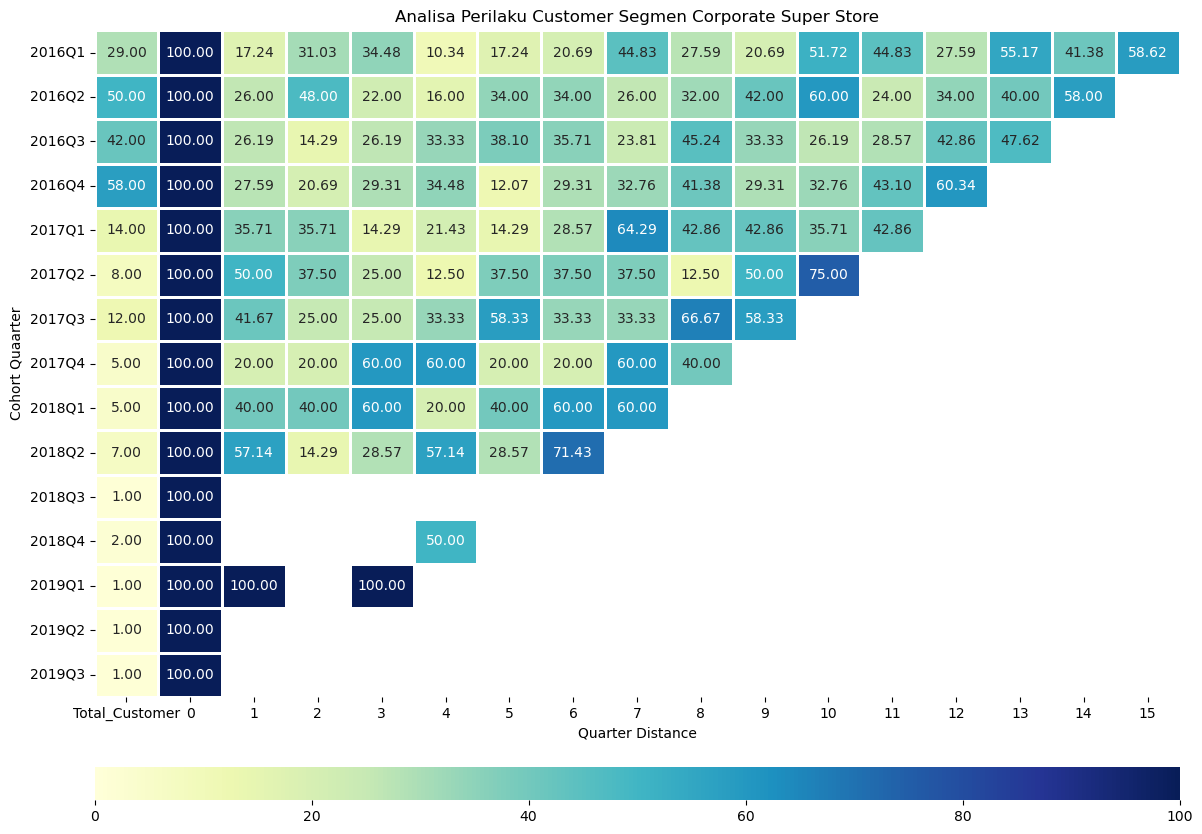

In [80]:
grid_kw = {
    'height_ratios': (20, 1),       
    'hspace': 0.2                  
}


fig, (ax_top, ax_bottom) = plt.subplots(nrows= 2, ncols= 1, figsize= (14, 10), gridspec_kw= grid_kw)

sns.heatmap(
    data= df_cohort_corporate_percent,
    ax= ax_top,                                 
    cbar_ax= ax_bottom,                         
    cbar_kws= {'orientation': 'horizontal'},    
    annot= True,                                
    fmt= '.2f',                                 
    cmap= 'YlGnBu',                             
    linewidths= 2,
    vmin= 0,
    vmax= 100
)
ax_top.set_xlabel('Quarter Distance')
ax_top.set_ylabel('Cohort Quaarter')
ax_top.set_title('Analisa Perilaku Customer Segmen Corporate Super Store')


**Home Office Segment**

In [81]:
df_cohort_home_office = df_home_office[['Order Date', 'Customer ID']].copy()

# Cohort Quarter
df_cohort_home_office['cohort_quarter'] = df_cohort_home_office.groupby('Customer ID')['Order Date'].transform('min')
df_cohort_home_office['cohort_quarter'] =df_cohort_home_office['cohort_quarter'].dt.to_period('Q')

# Current Order
df_cohort_home_office['current_order_quarter'] = df_cohort_home_office['Order Date'].dt.to_period('Q')

# n_Customers
df_cohort_home_office = df_cohort_home_office.groupby(by=['cohort_quarter', 'current_order_quarter'])[['Customer ID']].nunique().reset_index()
df_cohort_home_office = df_cohort_home_office.rename(columns= {'Customer ID': 'n_customers'})

# Period Number
df_cohort_home_office['period_number'] = df_cohort_home_office['current_order_quarter'] - df_cohort_home_office['cohort_quarter']
df_cohort_home_office['period_number'] = df_cohort_home_office['period_number'].apply(attrgetter('n'))

df_cohort_consumer

,cohort_quarter,current_order_quarter,n_customers,period_number
0,2016Q1,2016Q1,70,0
1,2016Q1,2016Q2,11,1
2,2016Q1,2016Q3,16,2
3,2016Q1,2016Q4,23,3
4,2016Q1,2017Q1,13,4
...,...,...,...,...
124,2019Q2,2019Q2,1,0
125,2019Q2,2019Q4,1,2
126,2019Q3,2019Q3,2,0
127,2019Q3,2019Q4,1,1


In [82]:
df_cohort_home_office_pivot = df_cohort_home_office.pivot_table(
    index= 'cohort_quarter',
    columns= 'period_number',
    values='n_customers'
)

df_cohort_home_office_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
cohort_quarter,,,,,,,,,,,,,,,,
2016Q1,22.0,4.0,3.0,8.0,2.0,9.0,8.0,10.0,4.0,6.0,8.0,8.0,4.0,9.0,8.0,12.0
2016Q2,27.0,5.0,7.0,4.0,7.0,5.0,8.0,4.0,9.0,7.0,8.0,8.0,8.0,11.0,13.0,NaN
2016Q3,32.0,11.0,4.0,10.0,9.0,13.0,5.0,10.0,12.0,15.0,11.0,14.0,17.0,16.0,NaN,NaN
2016Q4,24.0,2.0,7.0,12.0,8.0,6.0,9.0,11.0,11.0,8.0,11.0,8.0,14.0,NaN,NaN,NaN
2017Q1,4.0,1.0,NaN,3.0,1.0,NaN,1.0,2.0,1.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN
2017Q2,9.0,2.0,4.0,3.0,3.0,4.0,5.0,4.0,1.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN
2017Q3,11.0,3.0,3.0,3.0,8.0,5.0,2.0,9.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2017Q4,9.0,1.0,1.0,1.0,3.0,4.0,NaN,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018Q1,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df_cohort_home_office_percent = (df_cohort_home_office_pivot.div(df_cohort_home_office_pivot[0], axis=0) * 100).round(2)
user_count = df_cohort_home_office_pivot[0].to_frame()
df_cohort_home_office_percent.insert(0, 'Total_Customer', user_count)
df_cohort_home_office_percent

period_number,Total_Customer,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
cohort_quarter,,,,,,,,,,,,,,,,,
2016Q1,22.0,100.0,18.18,13.64,36.36,9.09,40.91,36.36,45.45,18.18,27.27,36.36,36.36,18.18,40.91,36.36,54.55
2016Q2,27.0,100.0,18.52,25.93,14.81,25.93,18.52,29.63,14.81,33.33,25.93,29.63,29.63,29.63,40.74,48.15,NaN
2016Q3,32.0,100.0,34.38,12.50,31.25,28.12,40.62,15.62,31.25,37.50,46.88,34.38,43.75,53.12,50.00,NaN,NaN
2016Q4,24.0,100.0,8.33,29.17,50.00,33.33,25.00,37.50,45.83,45.83,33.33,45.83,33.33,58.33,NaN,NaN,NaN
2017Q1,4.0,100.0,25.00,NaN,75.00,25.00,NaN,25.00,50.00,25.00,25.00,NaN,50.00,NaN,NaN,NaN,NaN
2017Q2,9.0,100.0,22.22,44.44,33.33,33.33,44.44,55.56,44.44,11.11,55.56,44.44,NaN,NaN,NaN,NaN,NaN
2017Q3,11.0,100.0,27.27,27.27,27.27,72.73,45.45,18.18,81.82,45.45,45.45,NaN,NaN,NaN,NaN,NaN,NaN
2017Q4,9.0,100.0,11.11,11.11,11.11,33.33,44.44,NaN,44.44,55.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018Q1,1.0,100.0,NaN,100.00,NaN,100.00,NaN,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Analisa Perilaku Customer Segmen Home Office Super Store')

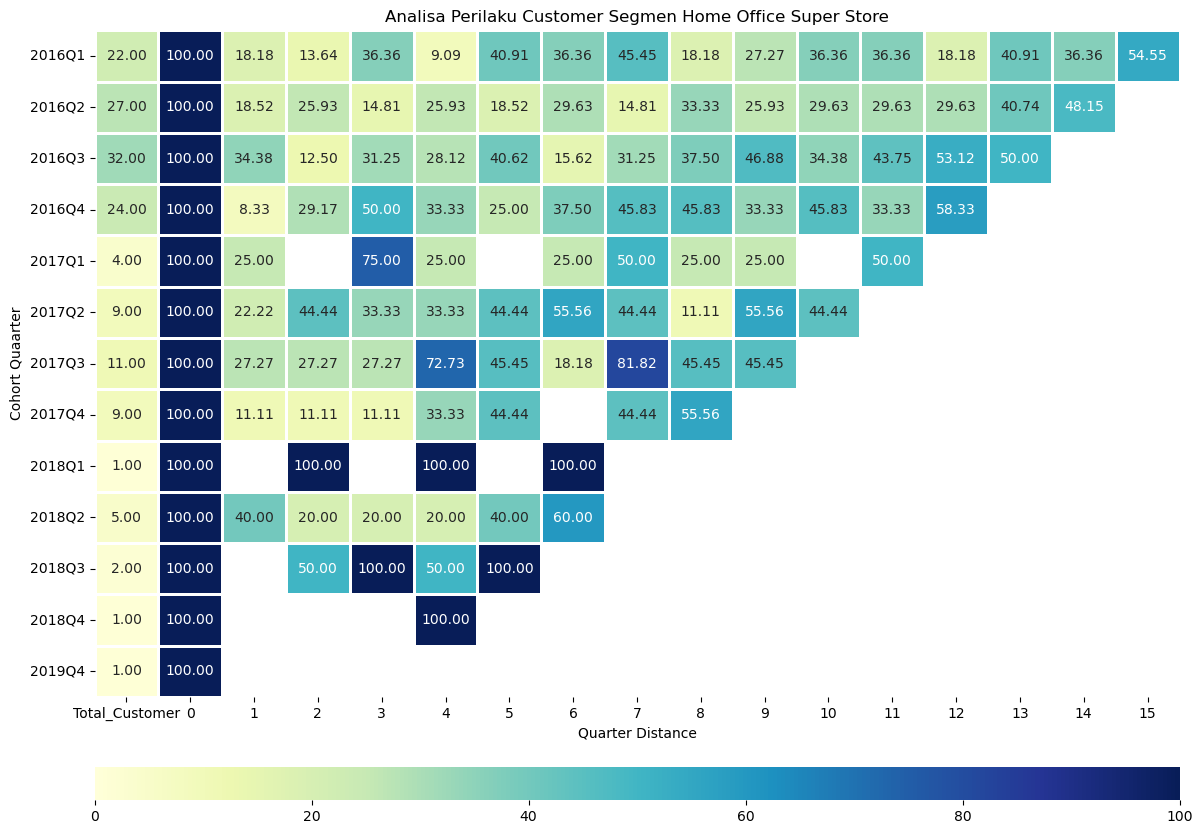

In [84]:
grid_kw = {
    'height_ratios': (20, 1),       
    'hspace': 0.2                  
}


fig, (ax_top, ax_bottom) = plt.subplots(nrows= 2, ncols= 1, figsize= (14, 10), gridspec_kw= grid_kw)

sns.heatmap(
    data= df_cohort_home_office_percent,
    ax= ax_top,                                 
    cbar_ax= ax_bottom,                         
    cbar_kws= {'orientation': 'horizontal'},    
    annot= True,                                
    fmt= '.2f',                                 
    cmap= 'YlGnBu',                             
    linewidths= 2,
    vmin= 0,
    vmax= 100
)
ax_top.set_xlabel('Quarter Distance')
ax_top.set_ylabel('Cohort Quaarter')
ax_top.set_title('Analisa Perilaku Customer Segmen Home Office Super Store')


**Avg Retention Rate**

In [85]:
df_avg_consumer = df_cohort_consumer_percent.copy()
df_avg_consumer = df_avg_consumer.drop(columns= 'Total_Customer')
df_avg_consumer['avg'] = df_avg_consumer.mean(axis= 1)
df_avg_consumer

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,avg
cohort_quarter,,,,,,,,,,,,,,,,,
2016Q1,100.0,15.71,22.86,32.86,18.57,18.57,27.14,31.43,20.00,31.43,28.57,45.71,31.43,34.29,44.29,52.86,34.732500
2016Q2,100.0,25.30,32.53,15.66,34.94,30.12,51.81,19.28,31.33,34.94,48.19,20.48,39.76,49.40,51.81,NaN,39.036667
2016Q3,100.0,35.63,22.99,28.74,28.74,43.68,11.49,32.18,37.93,47.13,17.24,42.53,42.53,55.17,NaN,NaN,38.998571
2016Q4,100.0,12.68,16.90,26.76,46.48,23.94,33.80,39.44,39.44,23.94,36.62,43.66,64.79,NaN,NaN,NaN,39.111538
2017Q1,100.0,14.29,35.71,21.43,14.29,28.57,50.00,35.71,35.71,35.71,14.29,57.14,NaN,NaN,NaN,NaN,36.904167
2017Q2,100.0,26.32,36.84,26.32,31.58,47.37,42.11,31.58,26.32,57.89,57.89,NaN,NaN,NaN,NaN,NaN,44.020000
2017Q3,100.0,53.85,30.77,15.38,15.38,30.77,23.08,46.15,46.15,23.08,NaN,NaN,NaN,NaN,NaN,NaN,38.461000
2017Q4,100.0,5.56,16.67,38.89,33.33,38.89,27.78,33.33,55.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.890000
2018Q1,100.0,50.00,37.50,50.00,75.00,50.00,62.50,50.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.375000


In [86]:
average_consumer = df_avg_consumer['avg'].mean()
average_consumer

56.1163402014652

In [87]:
df_avg_corporate = df_cohort_corporate_percent.copy()
df_avg_corporate = df_avg_corporate.drop(columns= 'Total_Customer')
df_avg_corporate['avg'] = df_avg_corporate.mean(axis= 1)
df_avg_corporate

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,avg
cohort_quarter,,,,,,,,,,,,,,,,,
2016Q1,100.0,17.24,31.03,34.48,10.34,17.24,20.69,44.83,27.59,20.69,51.72,44.83,27.59,55.17,41.38,58.62,37.715000
2016Q2,100.0,26.00,48.00,22.00,16.00,34.00,34.00,26.00,32.00,42.00,60.00,24.00,34.00,40.00,58.00,NaN,39.733333
2016Q3,100.0,26.19,14.29,26.19,33.33,38.10,35.71,23.81,45.24,33.33,26.19,28.57,42.86,47.62,NaN,NaN,37.245000
2016Q4,100.0,27.59,20.69,29.31,34.48,12.07,29.31,32.76,41.38,29.31,32.76,43.10,60.34,NaN,NaN,NaN,37.930769
2017Q1,100.0,35.71,35.71,14.29,21.43,14.29,28.57,64.29,42.86,42.86,35.71,42.86,NaN,NaN,NaN,NaN,39.881667
2017Q2,100.0,50.00,37.50,25.00,12.50,37.50,37.50,37.50,12.50,50.00,75.00,NaN,NaN,NaN,NaN,NaN,43.181818
2017Q3,100.0,41.67,25.00,25.00,33.33,58.33,33.33,33.33,66.67,58.33,NaN,NaN,NaN,NaN,NaN,NaN,47.499000
2017Q4,100.0,20.00,20.00,60.00,60.00,20.00,20.00,60.00,40.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.444444
2018Q1,100.0,40.00,40.00,60.00,20.00,40.00,60.00,60.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.500000


In [88]:
average_corporate = df_avg_corporate['avg'].mean()
average_corporate

60.41006879046879

In [89]:
df_avg_home_office = df_cohort_home_office_percent.copy()
df_avg_home_office = df_avg_home_office.drop(columns= 'Total_Customer')
df_avg_home_office['avg'] = df_avg_home_office.mean(axis= 1)
df_avg_home_office

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,avg
cohort_quarter,,,,,,,,,,,,,,,,,
2016Q1,100.0,18.18,13.64,36.36,9.09,40.91,36.36,45.45,18.18,27.27,36.36,36.36,18.18,40.91,36.36,54.55,35.510000
2016Q2,100.0,18.52,25.93,14.81,25.93,18.52,29.63,14.81,33.33,25.93,29.63,29.63,29.63,40.74,48.15,NaN,32.346000
2016Q3,100.0,34.38,12.50,31.25,28.12,40.62,15.62,31.25,37.50,46.88,34.38,43.75,53.12,50.00,NaN,NaN,39.955000
2016Q4,100.0,8.33,29.17,50.00,33.33,25.00,37.50,45.83,45.83,33.33,45.83,33.33,58.33,NaN,NaN,NaN,41.985385
2017Q1,100.0,25.00,NaN,75.00,25.00,NaN,25.00,50.00,25.00,25.00,NaN,50.00,NaN,NaN,NaN,NaN,44.444444
2017Q2,100.0,22.22,44.44,33.33,33.33,44.44,55.56,44.44,11.11,55.56,44.44,NaN,NaN,NaN,NaN,NaN,44.442727
2017Q3,100.0,27.27,27.27,27.27,72.73,45.45,18.18,81.82,45.45,45.45,NaN,NaN,NaN,NaN,NaN,NaN,49.089000
2017Q4,100.0,11.11,11.11,11.11,33.33,44.44,NaN,44.44,55.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.887500
2018Q1,100.0,NaN,100.00,NaN,100.00,NaN,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000


In [90]:
average_home_office = df_avg_home_office['avg'].mean()
average_home_office

57.65516916843839

In [91]:
retention_rate = pd.DataFrame([average_consumer,average_corporate,average_home_office])
retention_rate = retention_rate.rename(
    columns={0:'Avg Retention Rate (%)'},
    index={0: 'Consumer', 1: 'Corporate', 2: 'Home Office'})
retention_rate

,Avg Retention Rate (%)
Consumer,56.116340
Corporate,60.410069
Home Office,57.655169


**Cohort Summary**

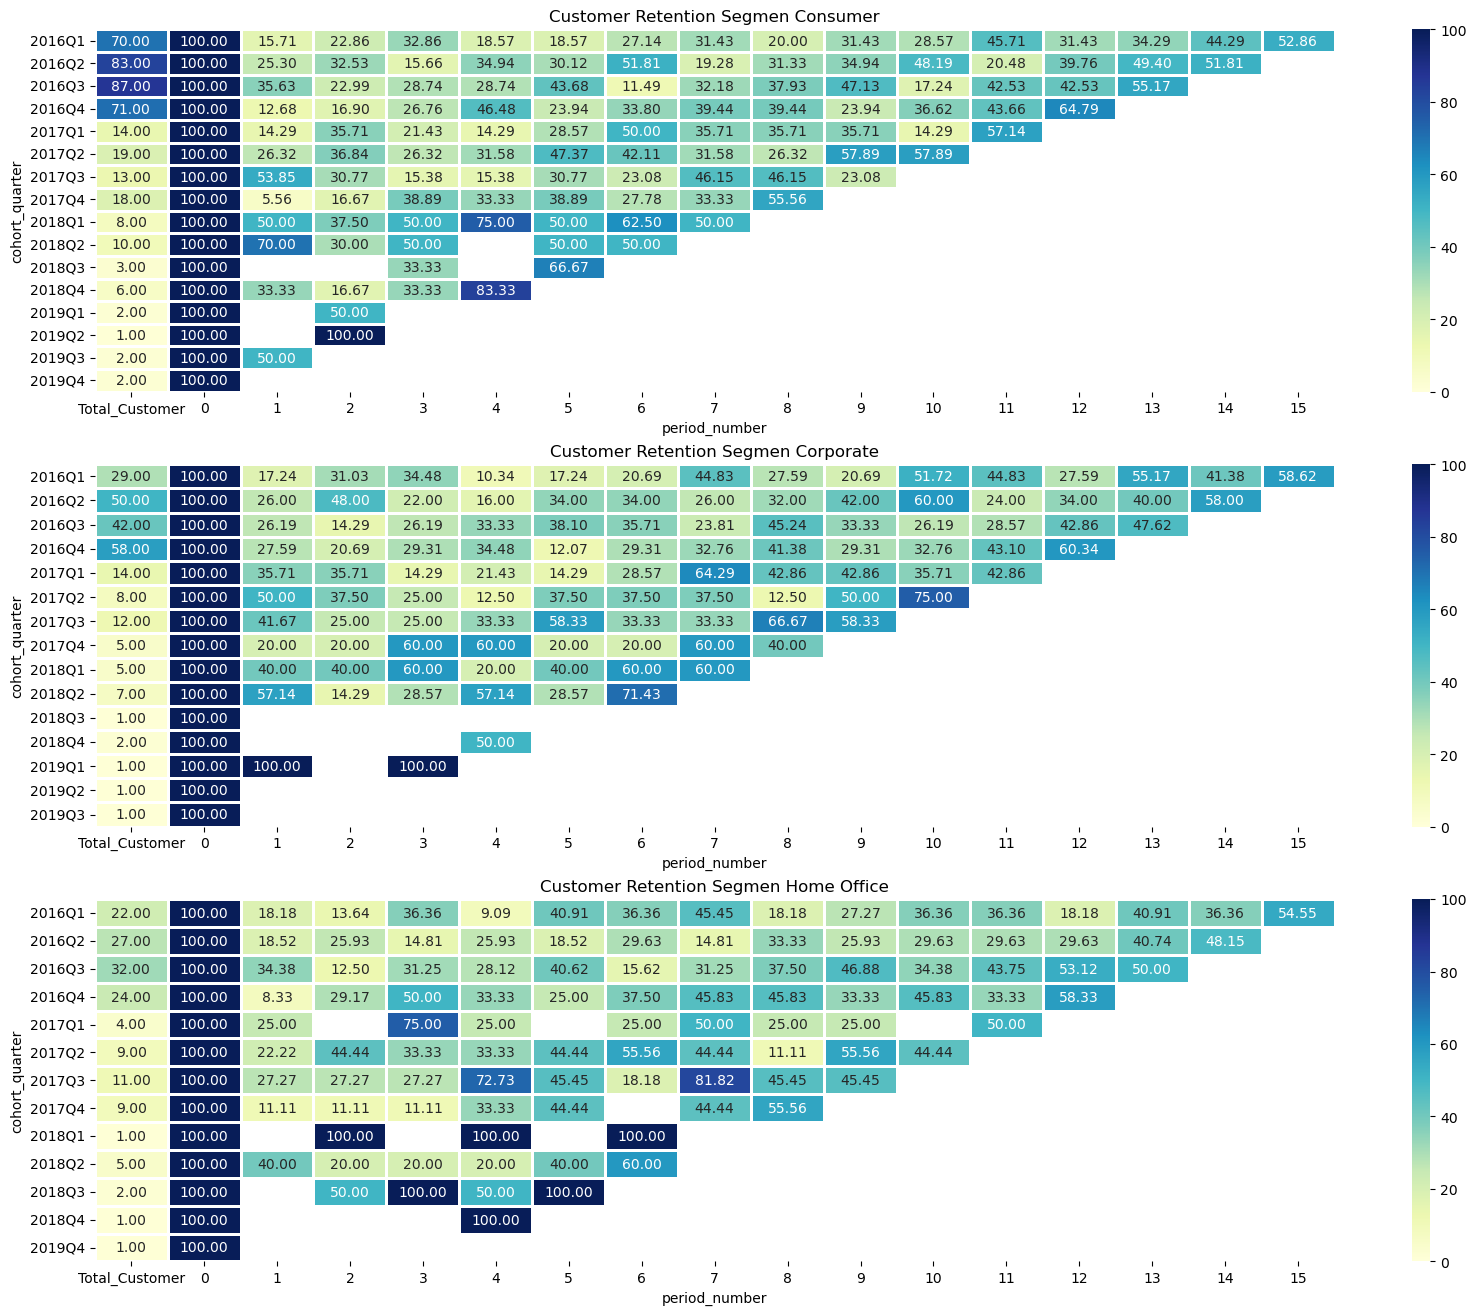

In [92]:
fig, axes = plt.subplots(3, 1, figsize=(20, 16))


sns.heatmap(
    data=df_cohort_consumer_percent,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    linewidths=2,
    vmin=0,
    vmax=100,
    ax=axes[0]  
)
axes[0].set_title('Customer Retention Segmen Consumer')  


sns.heatmap(
    data=df_cohort_corporate_percent,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    linewidths=2,
    vmin=0,
    vmax=100,
    ax=axes[1]  
)
axes[1].set_title('Customer Retention Segmen Corporate')  


sns.heatmap(
    data=df_cohort_home_office_percent,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    linewidths=2,
    vmin=0,
    vmax=100,
    ax=axes[2]  
)
axes[2].set_title('Customer Retention Segmen Home Office') 


plt.subplots_adjust(wspace=3)


plt.show()


**Insights**

- Untuk setiap segment, terjadi penurunan jumlah customer baru dari tahun 2016 ke akhir tahun 2019
- Customer dengan average retention rate paling tinggi berasal dari segment Corporate

---
### **Operational Performance Analysis**

**3PL Mode Return Rate**

In [93]:
df_shipdays = df.copy()
df_shipdays['Processing Days'] = df_shipdays['Ship Date']-df_shipdays['Order Date']
df_ship_group = df_shipdays[['Region','Processing Days']].groupby(['Region']).mean().reset_index()
df_ship_group['Processing Days'] = df_ship_group['Processing Days'].astype(str)
df_ship_group['Processing Days'] = pd.to_timedelta(df_ship_group['Processing Days'])

# extract the number of days as an integer
df_ship_group['Avg Processing Days'] = df_ship_group['Processing Days'].dt.days

df_ship_group = df_ship_group.drop('Processing Days',axis=1)
df_ship_group


,Region,Avg Processing Days
0,Central,4
1,East,3
2,South,3
3,West,3


In [94]:
avg_process_days = df_ship_group['Avg Processing Days'].mean()
avg_process_second = avg_process_days*86400

In [95]:
df_orders = pd.read_excel('Sample - Superstore.xlsx',sheet_name='Orders')
df_return = pd.read_excel('Sample - Superstore.xlsx',sheet_name='Returns')

c:\Users\wydzka\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
c:\Users\wydzka\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [96]:
df_order_id = df_orders[['Order ID']].drop_duplicates().reset_index(drop=True)
df_return[['Order ID']] = df_return[['Order ID']].drop_duplicates()
df_return = df_return.dropna().reset_index(drop=True)
df_order_returned = pd.merge(left=df_order_id,right=df_return,on='Order ID',how='left').fillna('No')
df_order_full = pd.merge(left=df_orders,right=df_order_returned,on='Order ID',how='left')
df_order_full['Processing Days'] = df_order_full['Ship Date'] - df_order_full['Order Date']
df_order_full['Processing Days in Seconds'] = df_order_full['Processing Days'].dt.total_seconds().astype(int)
df_order_full['Shipping Status'] = df_order_full['Processing Days in Seconds'].apply(lambda x: 'Late' if x > avg_process_second else 'On Time')

In [97]:
total_order = df_order_full['Order ID'].nunique()
total_order

5009

In [98]:
df_return_list = df_order_full[df_order_full['Returned']=='Yes']

In [99]:
pivot_order = pd.pivot_table(
    data=df_return_list,
    columns=['Ship Mode'],
    index=['Segment','Category'],
    values='Product Name',
    aggfunc='count',
)
pivot_order

Ship Mode                    First Class  Same Day  Second Class  \
Segment     Category                                               
Consumer    Furniture               14.0       9.0          12.0   
            Office Supplies         47.0      30.0          33.0   
            Technology              15.0      13.0          14.0   
Corporate   Furniture                7.0       1.0          14.0   
            Office Supplies         25.0       7.0          31.0   
            Technology               8.0       1.0           6.0   
Home Office Furniture                9.0       NaN           4.0   
            Office Supplies         18.0       3.0          13.0   
            Technology               9.0       NaN           7.0   

Ship Mode                    Standard Class  
Segment     Category                         
Consumer    Furniture                  58.0  
            Office Supplies           136.0  
            Technology                 45.0  
Corporate   Furniture                  33.0  
            Office Supplies            93.0  
            Technology                 31.0  
Home Office Furniture                  10.0  
            Office Supplies            37.0  
            Technology                  7.0

In [100]:
df_pct_returned = pd.DataFrame(pivot_order.sum(axis=0)).rename(columns={0:'Returned Order Count'})
df_pct_returned

,Returned Order Count
Ship Mode,
First Class,152.0
Same Day,64.0
Second Class,134.0
Standard Class,450.0


In [101]:
df_pct_returned['Return Rate (%)'] = (df_pct_returned['Returned Order Count']/total_order*100).round(2)
df_pct_returned

,Returned Order Count,Return Rate (%)
Ship Mode,,
First Class,152.0,3.03
Same Day,64.0,1.28
Second Class,134.0,2.68
Standard Class,450.0,8.98


**Return Rate based on Shipping Days**

In [102]:
pivot_return = pd.pivot_table(
    data=df_order_full,
    columns=['Shipping Status'],
    index=['Segment','Category'],
    values='Product Name',
    aggfunc='count',
)
pivot_return

Shipping Status              Late  On Time
Segment     Category                      
Consumer    Furniture         739      374
            Office Supplies  2103     1024
            Technology        637      314
Corporate   Furniture         449      197
            Office Supplies  1240      580
            Technology        376      178
Home Office Furniture         243      119
            Office Supplies   760      319
            Technology        219      123

In [103]:
pivot_return['Late Return Rate (%)'] = (pivot_return['Late']/total_order*100).round(2)
pivot_return['On Time Return Rate (%)'] = (pivot_return['On Time']/total_order*100).round(2)

In [104]:
pivot_return

Shipping Status              Late  On Time  Late Return Rate (%)  \
Segment     Category                                               
Consumer    Furniture         739      374                 14.75   
            Office Supplies  2103     1024                 41.98   
            Technology        637      314                 12.72   
Corporate   Furniture         449      197                  8.96   
            Office Supplies  1240      580                 24.76   
            Technology        376      178                  7.51   
Home Office Furniture         243      119                  4.85   
            Office Supplies   760      319                 15.17   
            Technology        219      123                  4.37   

Shipping Status              On Time Return Rate (%)  
Segment     Category                                  
Consumer    Furniture                           7.47  
            Office Supplies                    20.44  
            Technology                          6.27  
Corporate   Furniture                           3.93  
            Office Supplies                    11.58  
            Technology                          3.55  
Home Office Furniture                           2.38  
            Office Supplies                     6.37  
            Technology                          2.46

**Insights**

- Pada barang yang di return, persentase barang di return karena pengiriman terlambat jauh lebih besar secara signfikan
- Persentase 3PL mode yang memiliki return rate paling kecil adalah Same Day service

---
### **Conclusion**

**Prioritas 1**

Mentargetkan segment Corporate khusus kategori **Technology** di region West dan East dengan 3PL mode of choice Same Day service, karena:
 - Sales dan profit memiliki growth paling tinggi
 - Sales dan profit memiliki rasio yang paling tinggi dibandingkan seluruh segment
 - Daya beli dari segment Corporate untuk produk Technology tergolong tinggi
 - Price elasticity dari segment ini tergolong tidak elastis, sehingga dapat dimanfaatkan untuk mengingkatkan profit (tidak perlu diskon tinggi)
 - Customer pada segment ini cenderung loyal (selalu repeat tiap bulan nya), akan tetapi pertumbuhan customer baru nya, sangat rendah. Perlu fokus tambahan untuk menambah jumlah customer, agar growth dan sales lebih tinggi
 - Dapat fokus melakukan promosi apabila menggunakan 3PL mode Same Day service, guna mengurangi return rate yang tinggi, sehingga dapat menjaga profit

**Prioritas 2**

Mentargetkan segment Corporate kategori **Furniture** di region West dan East dengan 3PL mode of choice Same Day service, karena:
 - Sales masih cenderung stagnant, artinya masih ada market yang belum tercapai, sehinga masih banyak ruang untuk meningkatkan growth sales
 - Daya beli dari segment Corporate untuk produk Furniture tergolong tinggi
 - Price elasticity dari segment ini tergolong tidak elastis, sehingga dapat dimanfaatkan untuk mengingkatkan profit (tidak perlu diskon tinggi)
 - Merubah strategi di tahun 2020 dibandingkan tahun sebelumnya, dimana pada produk furniture diberikan diskon yang besar. Karena price elasticity nya tidak elastis, maka tidak perlu diskon yang besar untuk menarik customer, sehingga dapat memaksimalkan profit 
 - Customer pada segment ini cenderung loyal (selalu repeat tiap bulan nya), akan tetapi pertumbuhan customer baru nya, sangat rendah. Perlu fokus tambahan untuk menambah jumlah customer, agar growth dan sales lebih tinggi
 - Dapat fokus melakukan promosi apabila menggunakan 3PL mode Same Day service, guna mengurangi return rate yang tinggi, sehingga dapat menjaga profit